In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from collections import Counter
from datetime import datetime
from datetime import timedelta
from dateutil import rrule
import random
from datetime import date
from sklearn.model_selection import  GridSearchCV
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("behamics.csv")

In [3]:
df.head(5)

,date,userID,sessionID,tempSessionID,productID,name,price,formerPrice,size,amount,color,category,brand,gender,material
0,7/1/21 0:01,vsKXLrDqlOFwBiQQoxAB,ioAaWdN9SEvxNrtopnKXTjwy8X4EXFMW,VPMTToxkA9sL1LAoaST0lZcUe47LKi,0000100_1a,Mit Leinen: Hemdblusenkleid,39.99,79.99,42,1,BEIGE,E05/Dresses,collection,sale-women,"Viskose , Leinen"
1,7/1/21 0:09,Gmw1o6XUzcGsMuSf8MbD,N1XkNhQ5FGrVz6zFJ0Py4Gd1IEuRl2yw,HUQX4nVi3yqDz3P3tUHZcuGLRQrxG3,0000200_1a,#ReimagineFlexibility: 2-in-1 Softshell-Parka,79.99,169.99,XL,1,BLACK,G06/Jackets,collection,sale-men,Polyester (recycelt)
2,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000300_1a,T-Shirt aus 100% Organic Cotton,9.99,19.99,XL,1,BLACK,K00/T-Shirts,casual,men,Baumwolle (Biobaumwolle)
3,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000400_1a,Set: Oberteil und Hose,19.99,19.99,80_9-12m,1,BLUSH,N00/Mixed Sets,kidsnewborn,kids,"Baumwolle (Biobaumwolle) , Elasthan"
4,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000500_1a,Set: Oberteil und Hose,19.99,29.99,74_6-9m,1,CORAL,N00/Mixed Sets,baby_girls,sale-kids,"Baumwolle (Biobaumwolle) , Elasthan"


In [4]:
df.nunique()

date              35920
userID           159987
sessionID        159987
tempSessionID    197198
productID         15059
name               5646
price               111
formerPrice         116
size                906
amount               16
color               455
category            138
brand                13
gender                8
material            459
dtype: int64

In [5]:
df.dtypes

date              object
userID            object
sessionID         object
tempSessionID     object
productID         object
name              object
price            float64
formerPrice      float64
size              object
amount             int64
color             object
category          object
brand             object
gender            object
material          object
dtype: object

In [6]:
df.isnull().values.sum()

228194

In [7]:
df.columns[df.isnull().any()]

Index(['name', 'price', 'formerPrice', 'color', 'category', 'brand', 'gender',
       'material'],
      dtype='object')

In [8]:
def miss_val(df):
    plt.figure(figsize=(16,9))
    sns.heatmap(df.isnull())
    plt.show()

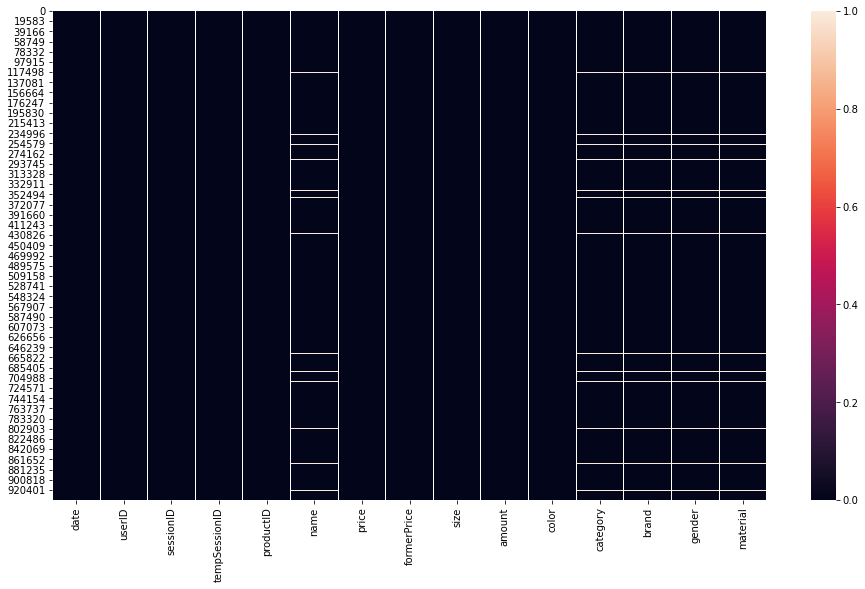

In [9]:
miss_val(df)

In [10]:
df.shape

(939982, 15)

In [11]:
df.dtypes

date              object
userID            object
sessionID         object
tempSessionID     object
productID         object
name              object
price            float64
formerPrice      float64
size              object
amount             int64
color             object
category          object
brand             object
gender            object
material          object
dtype: object

In [12]:
df.isnull().sum()

date                 0
userID               0
sessionID            0
tempSessionID        0
productID            0
name             44983
price             2099
formerPrice        922
size                 0
amount               0
color              160
category         44983
brand            44983
gender           44983
material         45081
dtype: int64

In [13]:
df.columns

Index(['date', 'userID', 'sessionID', 'tempSessionID', 'productID', 'name',
       'price', 'formerPrice', 'size', 'amount', 'color', 'category', 'brand',
       'gender', 'material'],
      dtype='object')

In [14]:
missing_columns = ['price', 'formerPrice','color','category','brand', 'gender', 'material']

In [15]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature ] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [16]:
for feature in missing_columns:
    df[feature ] = df[feature]
    df = random_imputation(df, feature)

In [17]:
df.isnull().sum()

date                 0
userID               0
sessionID            0
tempSessionID        0
productID            0
name             44983
price                0
formerPrice          0
size                 0
amount               0
color                0
category             0
brand                0
gender               0
material             0
dtype: int64

In [18]:
df.columns

Index(['date', 'userID', 'sessionID', 'tempSessionID', 'productID', 'name',
       'price', 'formerPrice', 'size', 'amount', 'color', 'category', 'brand',
       'gender', 'material'],
      dtype='object')

In [19]:
df.describe()

,price,formerPrice,amount
count,939982.000000,939982.000000,939982.000000
mean,29.683756,43.686934,1.026322
std,16.120489,22.061393,0.200519
min,2.990000,3.990000,1.000000
25%,19.990000,25.990000,1.000000
50%,29.990000,39.990000,1.000000
75%,39.990000,59.990000,1.000000
max,399.000000,399.000000,20.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939982 entries, 0 to 939981
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           939982 non-null  object 
 1   userID         939982 non-null  object 
 2   sessionID      939982 non-null  object 
 3   tempSessionID  939982 non-null  object 
 4   productID      939982 non-null  object 
 5   name           894999 non-null  object 
 6   price          939982 non-null  float64
 7   formerPrice    939982 non-null  float64
 8   size           939982 non-null  object 
 9   amount         939982 non-null  int64  
 10  color          939982 non-null  object 
 11  category       939982 non-null  object 
 12  brand          939982 non-null  object 
 13  gender         939982 non-null  object 
 14  material       939982 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 107.6+ MB


In [21]:
df.columns

Index(['date', 'userID', 'sessionID', 'tempSessionID', 'productID', 'name',
       'price', 'formerPrice', 'size', 'amount', 'color', 'category', 'brand',
       'gender', 'material'],
      dtype='object')

In [22]:
def F_dstring(data):
    for column in data.columns:
        if data[column].dtype==object:
            print(str(column)+' : '+str(data[column].unique()))
            print(data[column].value_counts())
            print('________________________________________')
        elif (data[column].dtype!=object) & (data[column].dtypes!=np.float64) & (data[column].dtypes!=np.int64):
            print('Nuk ka vlera string', end="\r", flush=True)

In [23]:
def F_uniq(DS):
    d=DS.apply(lambda col: col.unique())
    n=df.nunique()
    s=df.info()
    print(d,n,s)
F_uniq(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939982 entries, 0 to 939981
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           939982 non-null  object 
 1   userID         939982 non-null  object 
 2   sessionID      939982 non-null  object 
 3   tempSessionID  939982 non-null  object 
 4   productID      939982 non-null  object 
 5   name           894999 non-null  object 
 6   price          939982 non-null  float64
 7   formerPrice    939982 non-null  float64
 8   size           939982 non-null  object 
 9   amount         939982 non-null  int64  
 10  color          939982 non-null  object 
 11  category       939982 non-null  object 
 12  brand          939982 non-null  object 
 13  gender         939982 non-null  object 
 14  material       939982 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 107.6+ MB
date             [7/1/21 0:01, 7/1/21 0:09, 7/1/21 0:11, 7/

In [24]:
df.isnull().sum()

date                 0
userID               0
sessionID            0
tempSessionID        0
productID            0
name             44983
price                0
formerPrice          0
size                 0
amount               0
color                0
category             0
brand                0
gender               0
material             0
dtype: int64

In [25]:
def snsplot(col):
    plt.subplots(figsize=(14,6))
    sns.countplot(df[col])

In [26]:
def count_val(val,col):
    count = 0
    for i in df[col]:
        if i == val:
            count += 1
    print(count) 

In [27]:
def removeElements(lst, k):
    counted = Counter(lst)
    return [el for el in lst if counted[el] <= k]    

In [28]:
def out_val(n,data):
    s = []
    for i in data.tolist():
        if data.tolist().count(i) <= n:
            s.append(i)
            t = set(s)
    print(t)

In [29]:
df_EDA=df

# GENDER_CLASS

In [30]:
df['gender'].value_counts()

women         453827
sale-women    347652
men            53845
sale-men       33870
sale-kids      32485
kids           15739
home            2006
sale-home        558
Name: gender, dtype: int64

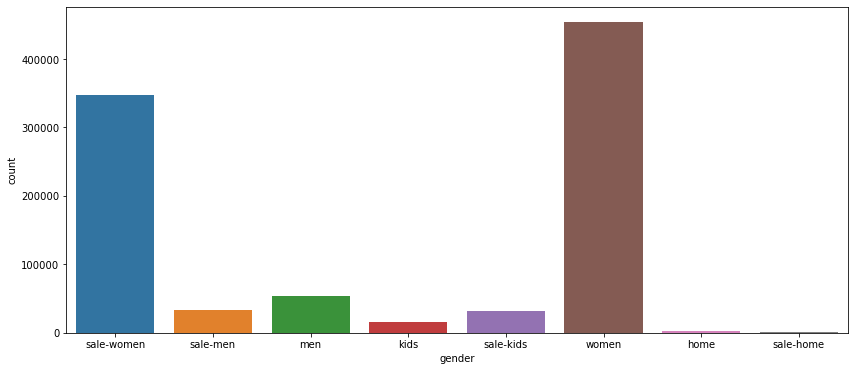

In [31]:
snsplot('gender')

In [32]:
df['gender'].value_counts()

women         453827
sale-women    347652
men            53845
sale-men       33870
sale-kids      32485
kids           15739
home            2006
sale-home        558
Name: gender, dtype: int64

In [33]:
df['gender_class']=df['gender']

In [34]:
df_EDA['gender']=df['gender_class']

In [35]:
count_gender=df['gender'].value_counts().to_dict()

In [36]:
df['gender']=df['gender'].map(count_gender)

In [37]:
df

,date,userID,sessionID,tempSessionID,productID,name,price,formerPrice,size,amount,color,category,brand,gender,material,gender_class
0,7/1/21 0:01,vsKXLrDqlOFwBiQQoxAB,ioAaWdN9SEvxNrtopnKXTjwy8X4EXFMW,VPMTToxkA9sL1LAoaST0lZcUe47LKi,0000100_1a,Mit Leinen: Hemdblusenkleid,39.99,79.99,42,1,BEIGE,E05/Dresses,collection,347652,"Viskose , Leinen",sale-women
1,7/1/21 0:09,Gmw1o6XUzcGsMuSf8MbD,N1XkNhQ5FGrVz6zFJ0Py4Gd1IEuRl2yw,HUQX4nVi3yqDz3P3tUHZcuGLRQrxG3,0000200_1a,#ReimagineFlexibility: 2-in-1 Softshell-Parka,79.99,169.99,XL,1,BLACK,G06/Jackets,collection,33870,Polyester (recycelt),sale-men
2,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000300_1a,T-Shirt aus 100% Organic Cotton,9.99,19.99,XL,1,BLACK,K00/T-Shirts,casual,53845,Baumwolle (Biobaumwolle),men
3,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000400_1a,Set: Oberteil und Hose,19.99,19.99,80_9-12m,1,BLUSH,N00/Mixed Sets,kidsnewborn,15739,"Baumwolle (Biobaumwolle) , Elasthan",kids
4,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000500_1a,Set: Oberteil und Hose,19.99,29.99,74_6-9m,1,CORAL,N00/Mixed Sets,baby_girls,32485,"Baumwolle (Biobaumwolle) , Elasthan",sale-kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939977,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0932000_1a,CURVY Crinkle-Blusenkleid mit Paisley-Print,39.99,79.99,44,1,LIGHT BEIGE,E05/Dresses,casual,453827,Viskose,women
939978,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0372000_1a,Espadrilles in Lederoptik,39.99,49.99,38,1,BLACK,W02/Shoes,casual,453827,Polyurethan,women
939979,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0688500_1a,Pantolette mit Schnalle in Kroko-Optik,29.99,39.99,38,1,CARAMEL,W05/Shoes,casual,453827,Polyurethan,women
939980,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0777100_1a,Wattierter,29.99,29.99,85 C,1,MEDIUM GREY,T01/Bodywear,casual,453827,"Baumwolle (Biobaumwolle) , Polyester , Elasthan",women


# CATEGORY

In [38]:
df.nunique()

date              35920
userID           159987
sessionID        159987
tempSessionID    197198
productID         15059
name               5646
price               111
formerPrice         116
size                906
amount               16
color               455
category            138
brand                13
gender                8
material            459
gender_class          8
dtype: int64

In [39]:
df['category'].unique()


array(['E05/Dresses', 'G06/Jackets', 'K00/T-Shirts', 'N00/Mixed Sets',
       'G20/Blazers', 'B20/Pants', 'K11/T-Shirts', 'G11/Blazers',
       'F02/Blouses', 'B00/Jeans', 'Y02/Nightwear', 'B02/Pants',
       'E03/Dresses', 'C02/Shorts', 'V01/Accessories', 'B03/Pants',
       'F06/Shirts', 'X66/Home', 'J01/Sweatshirts', 'E02/Dresses',
       'S01/Accessories', 'D03/Skirts', 'A00/Swim & Beach',
       'A02/Swim & Beach', 'G14/Coats', 'I00/Sweaters', 'O00/Accessories',
       'W02/Shoes', 'X33/Accessories', 'Z00/Various Items',
       'J00/Sweatshirts', 'T00/Bodywear', 'X44/Accessories',
       'T02/Bodywear', 'W05/Shoes', 'I01/Sweaters', 'E00/Dresses',
       'L02/Overalls', 'C00/Shorts', 'A01/Swim & Beach', 'D02/Skirts',
       'X01/Accessories', 'W01/Shoes', 'W04/Shoes', 'A05/Swim & Beach',
       'G02/Jackets', 'B04/Jeans', 'T05/Bodywear', 'X63/Home',
       'G00/Jackets', 'D05/Skirts', 'T01/Bodywear', 'A99/Swim & Beach',
       'S00/Accessories', 'X38/Accessories', 'X39/Accessories'

In [40]:
df['category'] = [x.split('/')[1] for x in df['category']]

In [41]:
df['category'].value_counts()

T-Shirts         216113
Swim & Beach     104748
Dresses          104631
Pants             94375
Blouses           80515
Jeans             61651
Shorts            53908
Sweaters          48613
Accessories       37229
Bodywear          36969
Skirts            24540
Shoes             20534
Sweatshirts       13124
Shirts             9736
Jackets            9660
Blazers            5885
Overalls           5246
Nightwear          4626
Coats              3291
Home               2921
Mixed Sets          688
Various Items       582
Vests               397
Name: category, dtype: int64

In [42]:
df_EDA['category']=df['category']

In [43]:
df=pd.get_dummies(df, columns=['category'])

In [44]:
df

,date,userID,sessionID,tempSessionID,productID,name,price,formerPrice,size,amount,...,category_Shirts,category_Shoes,category_Shorts,category_Skirts,category_Sweaters,category_Sweatshirts,category_Swim & Beach,category_T-Shirts,category_Various Items,category_Vests
0,7/1/21 0:01,vsKXLrDqlOFwBiQQoxAB,ioAaWdN9SEvxNrtopnKXTjwy8X4EXFMW,VPMTToxkA9sL1LAoaST0lZcUe47LKi,0000100_1a,Mit Leinen: Hemdblusenkleid,39.99,79.99,42,1,...,0,0,0,0,0,0,0,0,0,0
1,7/1/21 0:09,Gmw1o6XUzcGsMuSf8MbD,N1XkNhQ5FGrVz6zFJ0Py4Gd1IEuRl2yw,HUQX4nVi3yqDz3P3tUHZcuGLRQrxG3,0000200_1a,#ReimagineFlexibility: 2-in-1 Softshell-Parka,79.99,169.99,XL,1,...,0,0,0,0,0,0,0,0,0,0
2,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000300_1a,T-Shirt aus 100% Organic Cotton,9.99,19.99,XL,1,...,0,0,0,0,0,0,0,1,0,0
3,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000400_1a,Set: Oberteil und Hose,19.99,19.99,80_9-12m,1,...,0,0,0,0,0,0,0,0,0,0
4,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000500_1a,Set: Oberteil und Hose,19.99,29.99,74_6-9m,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939977,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0932000_1a,CURVY Crinkle-Blusenkleid mit Paisley-Print,39.99,79.99,44,1,...,0,0,0,0,0,0,0,0,0,0
939978,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0372000_1a,Espadrilles in Lederoptik,39.99,49.99,38,1,...,0,1,0,0,0,0,0,0,0,0
939979,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0688500_1a,Pantolette mit Schnalle in Kroko-Optik,29.99,39.99,38,1,...,0,1,0,0,0,0,0,0,0,0
939980,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0777100_1a,Wattierter,29.99,29.99,85 C,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_EDA['category'].value_counts()

T-Shirts         216113
Swim & Beach     104748
Dresses          104631
Pants             94375
Blouses           80515
Jeans             61651
Shorts            53908
Sweaters          48613
Accessories       37229
Bodywear          36969
Skirts            24540
Shoes             20534
Sweatshirts       13124
Shirts             9736
Jackets            9660
Blazers            5885
Overalls           5246
Nightwear          4626
Coats              3291
Home               2921
Mixed Sets          688
Various Items       582
Vests               397
Name: category, dtype: int64

# BRAND

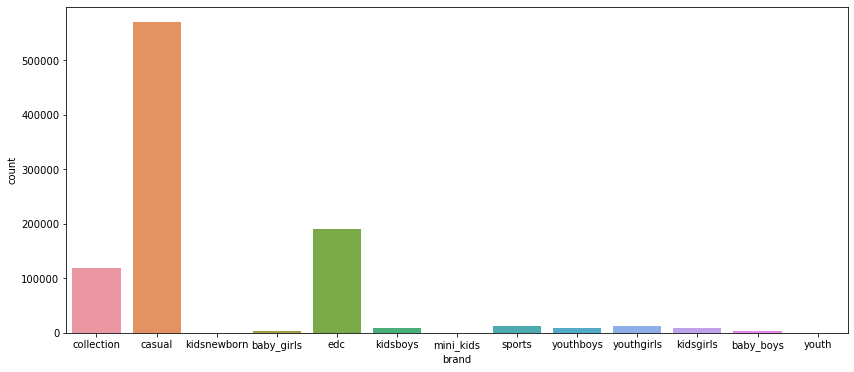

In [46]:
snsplot('brand')

In [47]:
df['brand'].value_counts()

casual         569482
edc            189923
collection     119255
sports          13089
youthgirls      12385
youthboys        9672
kidsboys         9645
kidsgirls        9557
baby_boys        3200
baby_girls       3028
mini_kids         560
kidsnewborn       162
youth              24
Name: brand, dtype: int64

In [48]:
df=pd.get_dummies(df, columns=['brand'])

In [49]:
df

,date,userID,sessionID,tempSessionID,productID,name,price,formerPrice,size,amount,...,brand_collection,brand_edc,brand_kidsboys,brand_kidsgirls,brand_kidsnewborn,brand_mini_kids,brand_sports,brand_youth,brand_youthboys,brand_youthgirls
0,7/1/21 0:01,vsKXLrDqlOFwBiQQoxAB,ioAaWdN9SEvxNrtopnKXTjwy8X4EXFMW,VPMTToxkA9sL1LAoaST0lZcUe47LKi,0000100_1a,Mit Leinen: Hemdblusenkleid,39.99,79.99,42,1,...,1,0,0,0,0,0,0,0,0,0
1,7/1/21 0:09,Gmw1o6XUzcGsMuSf8MbD,N1XkNhQ5FGrVz6zFJ0Py4Gd1IEuRl2yw,HUQX4nVi3yqDz3P3tUHZcuGLRQrxG3,0000200_1a,#ReimagineFlexibility: 2-in-1 Softshell-Parka,79.99,169.99,XL,1,...,1,0,0,0,0,0,0,0,0,0
2,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000300_1a,T-Shirt aus 100% Organic Cotton,9.99,19.99,XL,1,...,0,0,0,0,0,0,0,0,0,0
3,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000400_1a,Set: Oberteil und Hose,19.99,19.99,80_9-12m,1,...,0,0,0,0,1,0,0,0,0,0
4,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000500_1a,Set: Oberteil und Hose,19.99,29.99,74_6-9m,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939977,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0932000_1a,CURVY Crinkle-Blusenkleid mit Paisley-Print,39.99,79.99,44,1,...,0,0,0,0,0,0,0,0,0,0
939978,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0372000_1a,Espadrilles in Lederoptik,39.99,49.99,38,1,...,0,0,0,0,0,0,0,0,0,0
939979,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0688500_1a,Pantolette mit Schnalle in Kroko-Optik,29.99,39.99,38,1,...,0,0,0,0,0,0,0,0,0,0
939980,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0777100_1a,Wattierter,29.99,29.99,85 C,1,...,0,0,0,0,0,0,0,0,0,0


# SIZE


In [50]:
df['size'].value_counts()

M                 107413
L                  80383
S                  76336
38                 63933
40                 55500
                   ...  
30/22\n                1
44/36                  1
152_12г                1
140_10y/wide\n         1
46/36                  1
Name: size, Length: 906, dtype: int64

In [51]:
df['size'].unique()

array(['42', 'XL', '80_9-12m', '74_6-9m', '52', 'M', '40', '38', 'XXL',
       'L', '32/32', '38/27', '29/30', 'One Size', '116/122_6-7y',
       '134/140', '90 Cm', '40 C', '50', '54', 'S', '32/24', '31/28',
       '30/28', '32/28', '30/34', '29/32', '34', '44', '44/28', '46',
       '1SIZE', '30/32', 'XS', '28/30', '27/30', '70 B', '40-46', '30',
       '36 B', '36', '26/32', '27/26', '26/28', '42/34', '31/32', '40/32',
       '29', '42/30', '32', '32/34', '42/32', 'L\n', '30\n', '31\n',
       '38 C', '85 Cm', '80 Cm', '36/32', '37', '38 B', '38 E', '38 D',
       '27', '140_10y', 'S-140_10y', 'XL-176_16y', '28', '135/200',
       '31/30', '80 A', '176_16y', '90 D', '85 D', '38/24', '38/30\n',
       'M\n', 'XS\n', '31', '70 A', '85 B\n', '33/32', 'S/M', '36/28',
       '85 B', '38/28', '36/30', '36/24', '28/22', '40/26', '164_14y',
       'L-164_14y', '28/28', '105 Cm', '30/50', '44\n', '44 B', '146_11y',
       '146_11y/Skinny', '40 B', '80 C', '39', '42/24', '29/28', '37\n',
    

In [52]:
df.nunique()

date                       35920
userID                    159987
sessionID                 159987
tempSessionID             197198
productID                  15059
name                        5646
price                        111
formerPrice                  116
size                         906
amount                        16
color                        455
gender                         8
material                     459
gender_class                   8
category_Accessories           2
category_Blazers               2
category_Blouses               2
category_Bodywear              2
category_Coats                 2
category_Dresses               2
category_Home                  2
category_Jackets               2
category_Jeans                 2
category_Mixed Sets            2
category_Nightwear             2
category_Overalls              2
category_Pants                 2
category_Shirts                2
category_Shoes                 2
category_Shorts                2
category_S

In [53]:
s1=df['size'].tolist()

In [54]:
s2=list(set(removeElements(s1, 3)))

In [55]:
s3=['replay_size' for i in range(len(s2))]

In [56]:
df.loc[:, 'size'].replace(s2, s3, inplace=True)

In [57]:
df

,date,userID,sessionID,tempSessionID,productID,name,price,formerPrice,size,amount,...,brand_collection,brand_edc,brand_kidsboys,brand_kidsgirls,brand_kidsnewborn,brand_mini_kids,brand_sports,brand_youth,brand_youthboys,brand_youthgirls
0,7/1/21 0:01,vsKXLrDqlOFwBiQQoxAB,ioAaWdN9SEvxNrtopnKXTjwy8X4EXFMW,VPMTToxkA9sL1LAoaST0lZcUe47LKi,0000100_1a,Mit Leinen: Hemdblusenkleid,39.99,79.99,42,1,...,1,0,0,0,0,0,0,0,0,0
1,7/1/21 0:09,Gmw1o6XUzcGsMuSf8MbD,N1XkNhQ5FGrVz6zFJ0Py4Gd1IEuRl2yw,HUQX4nVi3yqDz3P3tUHZcuGLRQrxG3,0000200_1a,#ReimagineFlexibility: 2-in-1 Softshell-Parka,79.99,169.99,XL,1,...,1,0,0,0,0,0,0,0,0,0
2,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000300_1a,T-Shirt aus 100% Organic Cotton,9.99,19.99,XL,1,...,0,0,0,0,0,0,0,0,0,0
3,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000400_1a,Set: Oberteil und Hose,19.99,19.99,80_9-12m,1,...,0,0,0,0,1,0,0,0,0,0
4,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000500_1a,Set: Oberteil und Hose,19.99,29.99,74_6-9m,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939977,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0932000_1a,CURVY Crinkle-Blusenkleid mit Paisley-Print,39.99,79.99,44,1,...,0,0,0,0,0,0,0,0,0,0
939978,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0372000_1a,Espadrilles in Lederoptik,39.99,49.99,38,1,...,0,0,0,0,0,0,0,0,0,0
939979,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0688500_1a,Pantolette mit Schnalle in Kroko-Optik,29.99,39.99,38,1,...,0,0,0,0,0,0,0,0,0,0
939980,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0777100_1a,Wattierter,29.99,29.99,85 C,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df.nunique()

date                       35920
userID                    159987
sessionID                 159987
tempSessionID             197198
productID                  15059
name                        5646
price                        111
formerPrice                  116
size                         728
amount                        16
color                        455
gender                         8
material                     459
gender_class                   8
category_Accessories           2
category_Blazers               2
category_Blouses               2
category_Bodywear              2
category_Coats                 2
category_Dresses               2
category_Home                  2
category_Jackets               2
category_Jeans                 2
category_Mixed Sets            2
category_Nightwear             2
category_Overalls              2
category_Pants                 2
category_Shirts                2
category_Shoes                 2
category_Shorts                2
category_S

In [59]:
df.loc[:, 'size'].replace(['one size ','one size','1SIZE','ONESIZE','Size 1 150cm', '                                        ONESIZE                                    ','jedna veľkosť','1'],['One Size','One Size','One Size','One Size','One Size','One Size','One Size','One Size'], inplace=True)

In [60]:
df['size'].unique()

array(['42', 'XL', '80_9-12m', '74_6-9m', '52', 'M', '40', '38', 'XXL',
       'L', '32/32', '38/27', '29/30', 'One Size', '116/122_6-7y',
       'replay_size', '90 Cm', '40 C', '50', '54', 'S', '32/24', '31/28',
       '30/28', '32/28', '30/34', '29/32', '34', '44', '44/28', '46',
       '30/32', 'XS', '28/30', '27/30', '70 B', '40-46', '30', '36 B',
       '36', '26/32', '27/26', '26/28', '42/34', '31/32', '40/32', '29',
       '42/30', '32', '32/34', '42/32', 'L\n', '30\n', '31\n', '38 C',
       '85 Cm', '80 Cm', '36/32', '37', '38 B', '38 E', '38 D', '27',
       '140_10y', 'S-140_10y', 'XL-176_16y', '28', '135/200', '31/30',
       '80 A', '176_16y', '90 D', '85 D', '38/24', '38/30\n', 'M\n',
       'XS\n', '31', '70 A', '85 B\n', '33/32', 'S/M', '36/28', '85 B',
       '38/28', '36/30', '36/24', '28/22', '40/26', '164_14y',
       'L-164_14y', '28/28', '105 Cm', '30/50', '44\n', '44 B', '146_11y',
       '146_11y/Skinny', '40 B', '80 C', '39', '42/24', '29/28', '37\n',
       '3

In [61]:
count_val('122','size')

0


In [62]:
list=(df['size'].unique()).tolist()    

In [63]:
def list_by(y,lists):
       x = []
       for i in lists:
              if y in i:
                     x.append(i)
       return x

In [64]:
y2=list_by('_2y',list)
y3=list_by('_3y',list)
y4=list_by('_4y',list)
y5=list_by('_5y',list)
y6=list_by('_6y',list)
y7=list_by('_7y',list)
y8=list_by('_8y',list)
y9=list_by('_9y',list)
y10=list_by('10y',list)
y11=list_by('11y',list)
y12=list_by('12y',list)
y13=list_by('13y',list)
y14=list_by('14y',list)
y15=list_by('15y',list)
y16=list_by('16y',list)



In [65]:
y12.extend(['М-152_12г'])
y15.extend(['26/25', '25/32', '26/26','26/22','25/28','26/32','26/28','26/24','25/22','36'])
y14.extend(['26/30','25/30','25/26','26/25','29', '32', '31','30',])
y4.extend(['53_3-4y'])
y6.extend(['55_5-6y'])
y16.extend(['28','27'])

In [66]:
y_5=list_by('-5y',list)
y_7=list_by('-7y',list)
y_9=list_by('-9y',list)

In [67]:
y_5s=['y5' for i in range(len(y_5))]
y_7s=['y7' for i in range(len(y_7))]
y_9s=['y9' for i in range(len(y_9))]

In [68]:
df.head(4)

,date,userID,sessionID,tempSessionID,productID,name,price,formerPrice,size,amount,...,brand_collection,brand_edc,brand_kidsboys,brand_kidsgirls,brand_kidsnewborn,brand_mini_kids,brand_sports,brand_youth,brand_youthboys,brand_youthgirls
0,7/1/21 0:01,vsKXLrDqlOFwBiQQoxAB,ioAaWdN9SEvxNrtopnKXTjwy8X4EXFMW,VPMTToxkA9sL1LAoaST0lZcUe47LKi,0000100_1a,Mit Leinen: Hemdblusenkleid,39.99,79.99,42,1,...,1,0,0,0,0,0,0,0,0,0
1,7/1/21 0:09,Gmw1o6XUzcGsMuSf8MbD,N1XkNhQ5FGrVz6zFJ0Py4Gd1IEuRl2yw,HUQX4nVi3yqDz3P3tUHZcuGLRQrxG3,0000200_1a,#ReimagineFlexibility: 2-in-1 Softshell-Parka,79.99,169.99,XL,1,...,1,0,0,0,0,0,0,0,0,0
2,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000300_1a,T-Shirt aus 100% Organic Cotton,9.99,19.99,XL,1,...,0,0,0,0,0,0,0,0,0,0
3,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000400_1a,Set: Oberteil und Hose,19.99,19.99,80_9-12m,1,...,0,0,0,0,1,0,0,0,0,0


In [69]:
list_year=[y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y_5,y_7,y_9]
for i in list_year:
    print(i,end='\n')

['92_2y', '51_2y', '92_2y/Skinny', '92_2y\n']
['98_3y', '98 _3y', '98_3y/Skinny', '98 _3y\n', '98_3y\n']
['104_4y', '104_4y/Regular', '104_4y/Skinny', '104_4y\n', '53_3-4y']
['110_5y', '110_5y/Regular', '110_5y/Skinny', '110_5y\n']
['116_6y', '116_6y/Regular', '116_6y/Skinny', '116_6y\n', '116_6y/regular', '55_5-6y']
['122_7y', '122_7y/Regular', '122_7y/Skinny', '122_7y\n', '122_7y/skinny', '122_7y/regular']
['XS-128_8y', 'XS-128_8y\n', '128_8y', '128_8y/Skinny', '128_8y/Regular', '128_8y/skinny', '128_8y\n', '128_8y/regular']
['134_9y/Skinny', '134_9y', '134_9y/Regular', '134_9y\n', '134_9y/skinny', '134_9y/regular', '134_9y/regular\n']
['140_10y', 'S-140_10y', '140_10y/Skinny', 'S-140_10y\n', '140_10y/Regular', '140_10y\n', '140_10y/Wide']
['146_11y', '146_11y/Skinny', '146_11y/regular', '146_11y\n', '146_11y/Regular', '146_11y/Wide', '146_11y/skinny', '146_11y/skinny\n', '57_7-11y']
['M-152_12y', '152_12y', 'M-152_12y\n', '152_12y\n', '152_12y/Regular', '152_12y/skinny', '152_12y/Sk

In [70]:
len(y2)+len(y3)+len(y4)+len(y5)+len(y6)+len(y7)+len(y8)+len(y9)+len(y10)+len(y11)+len(y12)+len(y13)+len(y14)+len(y15)+len(y16)

121

In [71]:
y2s=['y2' for i in range(len(y2))]
y3s=['y3' for i in range(len(y3))]
y4s=['y4' for i in range(len(y4))]
y5s=['y5' for i in range(len(y5))]
y6s=['y5' for i in range(len(y6))]
y7s=['y7' for i in range(len(y7))]
y8s=['y8' for i in range(len(y8))]
y9s=['y9' for i in range(len(y9))]
y10s=['y10' for i in range(len(y10))]
y11s=['y11' for i in range(len(y11))]
y12s=['y12' for i in range(len(y12))]
y13s=['y13' for i in range(len(y13))]
y14s=['y14' for i in range(len(y14))]
y15s=['y15' for i in range(len(y15))]
y16s=['y16' for i in range(len(y16))]

In [72]:
df.loc[:, 'size'].replace(y2, y2s, inplace=True)

In [73]:
df.loc[:, 'size'].replace(y3, y3s, inplace=True)

In [74]:
df.loc[:, 'size'].replace(y4, y4s, inplace=True)

In [75]:
df.loc[:, 'size'].replace(y5, y5s, inplace=True)

In [76]:
df.loc[:, 'size'].replace(y6, y6s, inplace=True)

In [77]:
df.loc[:, 'size'].replace(y7, y7s, inplace=True)

In [78]:
df.loc[:, 'size'].replace(y8, y8s, inplace=True)

In [79]:
df.loc[:, 'size'].replace(y9, y9s, inplace=True)

In [80]:
df.loc[:, 'size'].replace(y10, y10s, inplace=True)

In [81]:
df.loc[:, 'size'].replace(y11, y11s, inplace=True)

In [82]:
df.loc[:, 'size'].replace(y12, y12s, inplace=True)

In [83]:
df.loc[:, 'size'].replace(y13, y13s, inplace=True)

In [84]:
df.loc[:, 'size'].replace(y14, y14s, inplace=True)

In [85]:
df.loc[:, 'size'].replace(y15, y15s, inplace=True)

In [86]:
df.loc[:, 'size'].replace(y16, y16s, inplace=True)

In [87]:
df.loc[:, 'size'].replace(y_5, y_5s, inplace=True)
df.loc[:, 'size'].replace(y_7, y_7s, inplace=True)
df.loc[:, 'size'].replace(y_9, y_9s, inplace=True)

In [88]:
df.head(4)

,date,userID,sessionID,tempSessionID,productID,name,price,formerPrice,size,amount,...,brand_collection,brand_edc,brand_kidsboys,brand_kidsgirls,brand_kidsnewborn,brand_mini_kids,brand_sports,brand_youth,brand_youthboys,brand_youthgirls
0,7/1/21 0:01,vsKXLrDqlOFwBiQQoxAB,ioAaWdN9SEvxNrtopnKXTjwy8X4EXFMW,VPMTToxkA9sL1LAoaST0lZcUe47LKi,0000100_1a,Mit Leinen: Hemdblusenkleid,39.99,79.99,42,1,...,1,0,0,0,0,0,0,0,0,0
1,7/1/21 0:09,Gmw1o6XUzcGsMuSf8MbD,N1XkNhQ5FGrVz6zFJ0Py4Gd1IEuRl2yw,HUQX4nVi3yqDz3P3tUHZcuGLRQrxG3,0000200_1a,#ReimagineFlexibility: 2-in-1 Softshell-Parka,79.99,169.99,XL,1,...,1,0,0,0,0,0,0,0,0,0
2,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000300_1a,T-Shirt aus 100% Organic Cotton,9.99,19.99,XL,1,...,0,0,0,0,0,0,0,0,0,0
3,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000400_1a,Set: Oberteil und Hose,19.99,19.99,80_9-12m,1,...,0,0,0,0,1,0,0,0,0,0


In [89]:
df.nunique()

date                       35920
userID                    159987
sessionID                 159987
tempSessionID             197198
productID                  15059
name                        5646
price                        111
formerPrice                  116
size                         610
amount                        16
color                        455
gender                         8
material                     459
gender_class                   8
category_Accessories           2
category_Blazers               2
category_Blouses               2
category_Bodywear              2
category_Coats                 2
category_Dresses               2
category_Home                  2
category_Jackets               2
category_Jeans                 2
category_Mixed Sets            2
category_Nightwear             2
category_Overalls              2
category_Pants                 2
category_Shirts                2
category_Shoes                 2
category_Shorts                2
category_S

In [90]:
A=list_by('A',list)
B=list_by('B',list)
C=list_by('C',list)
D=list_by('D',list)
E=list_by('E',list)
F=list_by('F',list)
G=list_by('G',list)

In [91]:
B.extend(['164'])

In [92]:
AB__=[A,B,C,D,E,F]

In [93]:
for i in AB__:
    print(i)

['80 A', '70 A', '40 A', '38 A', '42 A', '80 A\n', '85 A', '40 A\n', '75 A', '36 A', '75 A\n', '36 A\n', '70 AA', '75 AA', '85 A\n', '65 AA', '90 A', '44 A', '42 A\n', '65 A', '38 A\n', '60 AA', '70 A\n', '90 A\n']
['70 B', '36 B', '38 B', '85 B\n', '85 B', '44 B', '40 B', '42 B', '75 B', '80 B', '80 B\n', '90 B', '38 B\n', '75 B\n', '80/B', '85/B', '40 B\n', '42 B\n', '36 B\n', '44 B\n', '70 B\n', '90 B\n', '164']
['90 Cm', '40 C', '38 C', '85 Cm', '80 Cm', '105 Cm', '80 C', '95 Cm', '42 C\n', '42 C', '44 C', '85 C', '36 C', '75 C', '70 C', '90 C', '75 Cm', '100 Cm', '38 C\n', '36 C\n', '110 Cm', '75 C\n', '80 C\n', '40 C\n', '85 C\n', '75/C', '85/C', '90 C\n', '80/C', '70 C\n', '44 C\n', '90/C']
['38 D', '90 D', '85 D', '80 D', '40 D', '42 D', '44 D', '75 D', '70 D', '36 D', '42 D\n', '75 D\n', '70 D\n', '44 D\n', '36 D\n', '85 D\n', '90/D', '38 D\n', '40 D\n', '90 D\n', '80 D\n', '85/D', '75/D', '80/D']
['38 E', '85 E', '44 E', '42 E', '75 E', '90 E', '40 E', '70 E\n', '36 E', '80 E

In [94]:
As=['A' for i in range(len(A))]
Bs=['B' for i in range(len(B))]
Cs=['C' for i in range(len(C))]
Ds=['D' for i in range(len(D))]
Es=['E' for i in range(len(E))]
Fs=['F' for i in range(len(F))]
Gs=['G' for i in range(len(G))]

In [95]:
df.head(4)

,date,userID,sessionID,tempSessionID,productID,name,price,formerPrice,size,amount,...,brand_collection,brand_edc,brand_kidsboys,brand_kidsgirls,brand_kidsnewborn,brand_mini_kids,brand_sports,brand_youth,brand_youthboys,brand_youthgirls
0,7/1/21 0:01,vsKXLrDqlOFwBiQQoxAB,ioAaWdN9SEvxNrtopnKXTjwy8X4EXFMW,VPMTToxkA9sL1LAoaST0lZcUe47LKi,0000100_1a,Mit Leinen: Hemdblusenkleid,39.99,79.99,42,1,...,1,0,0,0,0,0,0,0,0,0
1,7/1/21 0:09,Gmw1o6XUzcGsMuSf8MbD,N1XkNhQ5FGrVz6zFJ0Py4Gd1IEuRl2yw,HUQX4nVi3yqDz3P3tUHZcuGLRQrxG3,0000200_1a,#ReimagineFlexibility: 2-in-1 Softshell-Parka,79.99,169.99,XL,1,...,1,0,0,0,0,0,0,0,0,0
2,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000300_1a,T-Shirt aus 100% Organic Cotton,9.99,19.99,XL,1,...,0,0,0,0,0,0,0,0,0,0
3,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000400_1a,Set: Oberteil und Hose,19.99,19.99,80_9-12m,1,...,0,0,0,0,1,0,0,0,0,0


In [96]:
df.loc[:, 'size'].replace(A, As, inplace=True)

In [97]:
df.loc[:, 'size'].replace(B, Bs, inplace=True)

In [98]:
df.loc[:, 'size'].replace(C, Cs, inplace=True)

In [99]:
df.loc[:, 'size'].replace(D, Ds, inplace=True)

In [100]:
df.loc[:, 'size'].replace(E, Es, inplace=True)

In [101]:
df.loc[:, 'size'].replace(F, Fs, inplace=True)

In [102]:
df.loc[:, 'size'].replace(G, Gs, inplace=True)

In [103]:
count_val('E','size')

2448


In [104]:
#df['size']=df.replace({"\n": " "},regex=True)

In [105]:
df = df.replace('\n','', regex=True)

In [106]:
list1=(df['size'].unique()).tolist()   

In [107]:
k=list_by('/',list1)

In [108]:
k.remove('S/M')
k.remove('XS/S')
k.remove('M/L')
k.remove('XL/XXL')
k.remove('L/XL')
print(len(k))

k_sort=sorted(k, key = lambda x: x.split()[0-1])
#k.sort(key = int)
print(k_sort)
print(len(k))

178
['100/150', '100/180', '100/200', '104/110', '116/122', '128/134', '130/170', '130/250', '135/200', '140/146', '140/200', '140/245', '140/250', '146/152', '150/200', '152/156', '155/220', '16/22', '170/176', '18/18', '200/200', '26/28', '26/30', '26/32', '27/22', '27/24', '27/25', '27/26', '27/28', '27/30', '27/32', '27/34', '28/22', '28/24', '28/25', '28/26', '28/28', '28/30', '28/32', '28/34', '29/22', '29/24', '29/25', '29/26', '29/28', '29/30', '29/32', '29/34', '30/22', '30/24', '30/25', '30/26', '30/28', '30/30', '30/32', '30/34', '30/50', '31/22', '31/24', '31/25', '31/26', '31/28', '31/30', '31/32', '31/34', '32/22', '32/24', '32/25', '32/26', '32/27', '32/28', '32/30', '32/32', '32/34', '32/36', '33/22', '33/24', '33/25', '33/26', '33/28', '33/30', '33/32', '33/34', '33/36', '34/22', '34/24', '34/25', '34/26', '34/27', '34/28', '34/30', '34/32', '34/34', '34/36', '35/28', '35/30', '35/32', '35/36', '36/22', '36/24', '36/25', '36/26', '36/27', '36/28', '36/30', '36/32', '36

In [109]:
t=list_by('m',list1)

In [110]:
t_sort=sorted(t, key = lambda x: x.split()[0-1])

In [111]:
_S=['26/34', '27/22', '27/24', '27/25', '27/26', '27/28', '27/30', '27/32', '27/34', '28/22', '28/24', '28/25', '28/26', '28/28', '28/30', '28/32', '28/34', '29/22', '29/24', '29/25', '29/26', '29/28', '29/30', '29/32', '29/34','0.5_6-12m',
 '37_0-1m','39_1-2m','23-26','27-30','31-34','35-38','19', '5', '26',
'25', '16','4', '94', '8', '24', '35','33','36','37','29']

In [112]:
_S_rep=["S" for i in range(len(_S))]

In [113]:
df.loc[:, 'size'].replace(_S,_S_rep, inplace=True)

In [114]:
_M=['30/22', '30/24', '30/25', '30/26', '30/28', '30/30', '30/32', '30/34', '30/50', '31/22', '31/24', '31/25', '31/26', '31/28', '31/30', '31/32', '31/34', '32/22', '32/24', '32/25','Size 1_150cm', '41_3m',
 '45_9m','49_18m','56_1-2m','62_2-3m','36-38','43','41','50', '54', '34', '44','98','56','29','27','28',
 '36-41','38-40','39-42','40-42','40-46', '42-44','106','30','31','26/30','26/28','26/32','7','6','17','32','18']

In [115]:
_M_rep=["M" for i in range(len(_M))]


In [116]:
df.loc[:, 'size'].replace(_M,_M_rep, inplace=True)

In [117]:
_L=['32/26', '32/27', '32/28', '32/30', '32/32', '32/34', '32/36', '33/22', '33/24', '33/25', '33/26', '33/28', '33/30', '33/32', '33/34', '33/36', '34/22', '34/24', '34/25', '34/26', '34/27', '34/28', '34/30', '34/32', '34/34', '34/36''62_2-3m',
 '68_3-6m','50/30','52','48','46']

In [118]:
_L_rep=["L" for i in range(len(_L))]

In [119]:
df.loc[:, 'size'].replace(_L,_L_rep, inplace=True)

In [120]:
_XL=['35/28', '35/30', '35/32', '35/36', '36/22', '36/24', '36/25', '36/26', '36/27', '36/28', '36/30', '36/32', '36/34', '36/36', '37/28', '37/30','74_6-9m',
 '75 cm','43-46', '44-46', '47-50','45' ]

In [121]:
_XL_rep=["XL" for i in range(len(_XL))]

In [122]:
df.loc[:, 'size'].replace(_XL,_XL_rep, inplace=True)

In [123]:
_2XL=['37/32', '37/38', '38/22', '38/24', '38/25', '38/26', '38/27', '38/28', '38/30', '38/32', '38/34', '38/36', '38/38', '38/58','86_12-18m','80_9-12m','85 cm','80 cm']

In [124]:
_2XL_rep=["2XL" for i in range(len(_2XL))]

In [125]:
df.loc[:, 'size'].replace(_2XL,_2XL_rep, inplace=True)

In [126]:
_3XL=['39/40', '40/140', '40/22', '40/24', '40/25', '40/26', '40/27', '40/28', '40/30', '40/32', '40/34', '40/60', '41/42', '42/22', '42/24', '42/25', '42/26','90 cm',
 '95 cm']

In [127]:
_3XL_rep=["3XL" for i in range(len(_3XL))]

In [128]:
df.loc[:, 'size'].replace(_3XL,_3XL_rep, inplace=True)

In [129]:
_45XL=['52/28', '52/30','42/27', '42/28', '42/30', '42/32', '42/34', '43/43', '43/44', '44/22', '44/24', '44/25', '44/26', '44/27', '44/28', '44/30', '44/32', '44/34', '45/45', '45/46', '46/28', '46/30', '46/32', '46/34', '48/28', '48/30', '48/32', '48/34', '50/100', '50/28','105 cm',
 '110 cm','100 cm']

In [130]:
_45XL_rep=["45XL" for i in range(len(_45XL))]

In [131]:
df.loc[:, 'size'].replace(_45XL,_45XL_rep, inplace=True)

In [132]:
area=['100/150', '100/180', '100/200', '104/110', '116/122', '122/128', '128/134', '130/170', '130/250', '134/140', '135/200', '140/146', '140/200', '140/245', '140/250', '146/152', '150/200', '152/156', '155/220', '16/22', '170/176', '18/18', '200/200','60/90', '67/140', '70/85', '80/200', '92/98','50/50', '50/70','133x200',
       '120x170','164']

In [133]:
area_rep=["area" for i in range(len(area))]

In [134]:
df.loc[:, 'size'].replace(area, area_rep, inplace=True)

In [135]:
df['size'].unique()

array(['42', 'XL', '2XL', 'L', 'M', '40', '38', 'XXL', 'S', 'One Size',
       'y7', 'replay_size', 'C', '45XL', 'XS', 'B', 'y14', 'y15', '3XL',
       'E', 'D', 'y16', 'y10', 'area', 'A', 'S/M', 'y11', '39', 'XXS',
       'y13', 'XS/S', 'y5', 'y9', 'y8', 'y12', 'y4', 'y2', 'M/L', '5XL',
       'y3', 'F', 'XL/XXL', 'one size', '4XL', '102', 'G', 'L/XL',
       '34/36'], dtype=object)

In [136]:
count_val('50','size')

0


In [137]:
list2=(df['size'].unique()).tolist()  

In [138]:
v=list_by('-',list2)

In [139]:
v_sort=sorted(v, key = lambda x: x.split()[0-1])

In [140]:
df['size'].unique()

array(['42', 'XL', '2XL', 'L', 'M', '40', '38', 'XXL', 'S', 'One Size',
       'y7', 'replay_size', 'C', '45XL', 'XS', 'B', 'y14', 'y15', '3XL',
       'E', 'D', 'y16', 'y10', 'area', 'A', 'S/M', 'y11', '39', 'XXS',
       'y13', 'XS/S', 'y5', 'y9', 'y8', 'y12', 'y4', 'y2', 'M/L', '5XL',
       'y3', 'F', 'XL/XXL', 'one size', '4XL', '102', 'G', 'L/XL',
       '34/36'], dtype=object)

In [141]:
df['size'].value_counts()

M              185163
L              114181
S              109928
38              66239
XL              65780
40              57588
y15             47905
42              39453
XS              37477
One Size        23206
y14             22374
B               21609
C               18902
XXL             18526
2XL             14403
3XL             13460
45XL            12720
D                9935
A                7842
y16              6450
y9               5794
39               5015
y12              4840
y7               4722
y5               4688
y10              3888
y8               2809
area             2650
E                2448
y2               1710
F                1142
y3                980
y13               768
y11               741
one size          727
M/L               658
G                 544
y4                511
replay_size       316
XL/XXL            250
4XL               246
XS/S              245
34/36             240
L/XL              231
S/M               214
102       

In [142]:
df_EDA['size']=df['size']

In [143]:
df["size"] = df.groupby('size')['gender'].transform("mean")

df[["size",'gender']]

,size,gender
0,402155.835196,347652
1,324611.083521,33870
2,324611.083521,53845
3,351378.021454,15739
4,324611.083521,32485
...,...,...
939977,361329.120067,453827
939978,400661.243376,453827
939979,400661.243376,453827
939980,397139.201566,453827


In [144]:
df.head(3)

,date,userID,sessionID,tempSessionID,productID,name,price,formerPrice,size,amount,...,brand_collection,brand_edc,brand_kidsboys,brand_kidsgirls,brand_kidsnewborn,brand_mini_kids,brand_sports,brand_youth,brand_youthboys,brand_youthgirls
0,7/1/21 0:01,vsKXLrDqlOFwBiQQoxAB,ioAaWdN9SEvxNrtopnKXTjwy8X4EXFMW,VPMTToxkA9sL1LAoaST0lZcUe47LKi,0000100_1a,Mit Leinen: Hemdblusenkleid,39.99,79.99,402155.835196,1,...,1,0,0,0,0,0,0,0,0,0
1,7/1/21 0:09,Gmw1o6XUzcGsMuSf8MbD,N1XkNhQ5FGrVz6zFJ0Py4Gd1IEuRl2yw,HUQX4nVi3yqDz3P3tUHZcuGLRQrxG3,0000200_1a,#ReimagineFlexibility: 2-in-1 Softshell-Parka,79.99,169.99,324611.083521,1,...,1,0,0,0,0,0,0,0,0,0
2,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000300_1a,T-Shirt aus 100% Organic Cotton,9.99,19.99,324611.083521,1,...,0,0,0,0,0,0,0,0,0,0


# Material

In [145]:
df['material'].value_counts()

Baumwolle (Biobaumwolle)                                           161394
Baumwolle                                                           63627
Viskose ( LENZING™ ECOVERO™)                                        58165
Polyamid , Elasthan                                                 56700
Baumwolle (Biobaumwolle) , Elasthan                                 52668
                                                                    ...  
Baumwolle , Polyester , Metallisierte Faser                             1
Polyacryl , Polyamid , Elasthan                                         1
Polyamid , Elasthan , Metallisierte Faser (Lurex®)                      1
Baumwolle , Metall                                                      1
925 Sterling Silber , 925 Sterling Silber , 925 Sterling Silber         1
Name: material, Length: 459, dtype: int64

In [146]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['material'] = df['material'].str.replace(char, ' ')

In [147]:
df.head(4)

,date,userID,sessionID,tempSessionID,productID,name,price,formerPrice,size,amount,...,brand_collection,brand_edc,brand_kidsboys,brand_kidsgirls,brand_kidsnewborn,brand_mini_kids,brand_sports,brand_youth,brand_youthboys,brand_youthgirls
0,7/1/21 0:01,vsKXLrDqlOFwBiQQoxAB,ioAaWdN9SEvxNrtopnKXTjwy8X4EXFMW,VPMTToxkA9sL1LAoaST0lZcUe47LKi,0000100_1a,Mit Leinen: Hemdblusenkleid,39.99,79.99,402155.835196,1,...,1,0,0,0,0,0,0,0,0,0
1,7/1/21 0:09,Gmw1o6XUzcGsMuSf8MbD,N1XkNhQ5FGrVz6zFJ0Py4Gd1IEuRl2yw,HUQX4nVi3yqDz3P3tUHZcuGLRQrxG3,0000200_1a,#ReimagineFlexibility: 2-in-1 Softshell-Parka,79.99,169.99,324611.083521,1,...,1,0,0,0,0,0,0,0,0,0
2,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000300_1a,T-Shirt aus 100% Organic Cotton,9.99,19.99,324611.083521,1,...,0,0,0,0,0,0,0,0,0,0
3,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000400_1a,Set: Oberteil und Hose,19.99,19.99,351378.021454,1,...,0,0,0,0,1,0,0,0,0,0


In [148]:
df['material'] = [x.split(' ')[0] for x in df['material']]

In [149]:
df_EDA['material']=df['material']

In [150]:
df['material'] = df.groupby('material')['gender'].transform("mean")
df[['material', "gender"]]

,material,gender
0,396874.668856,347652
1,369305.854466,33870
2,322513.117939,53845
3,322513.117939,15739
4,322513.117939,32485
...,...,...
939977,396874.668856,453827
939978,400271.876153,453827
939979,400271.876153,453827
939980,322513.117939,453827


In [151]:
df.head(4)

,date,userID,sessionID,tempSessionID,productID,name,price,formerPrice,size,amount,...,brand_collection,brand_edc,brand_kidsboys,brand_kidsgirls,brand_kidsnewborn,brand_mini_kids,brand_sports,brand_youth,brand_youthboys,brand_youthgirls
0,7/1/21 0:01,vsKXLrDqlOFwBiQQoxAB,ioAaWdN9SEvxNrtopnKXTjwy8X4EXFMW,VPMTToxkA9sL1LAoaST0lZcUe47LKi,0000100_1a,Mit Leinen: Hemdblusenkleid,39.99,79.99,402155.835196,1,...,1,0,0,0,0,0,0,0,0,0
1,7/1/21 0:09,Gmw1o6XUzcGsMuSf8MbD,N1XkNhQ5FGrVz6zFJ0Py4Gd1IEuRl2yw,HUQX4nVi3yqDz3P3tUHZcuGLRQrxG3,0000200_1a,#ReimagineFlexibility: 2-in-1 Softshell-Parka,79.99,169.99,324611.083521,1,...,1,0,0,0,0,0,0,0,0,0
2,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000300_1a,T-Shirt aus 100% Organic Cotton,9.99,19.99,324611.083521,1,...,0,0,0,0,0,0,0,0,0,0
3,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000400_1a,Set: Oberteil und Hose,19.99,19.99,351378.021454,1,...,0,0,0,0,1,0,0,0,0,0


# Color

In [152]:
df['color'].value_counts()

NAVY                           138561
BLACK                          131325
WHITE                           71956
OFF WHITE                       65251
LIGHT KHAKI                     43186
                                ...  
STRAWBERRY                          1
DARK INDIGO DE                      1
NIEBIESKIE ŚWIATŁO PRZEMYTE         1
LIGHT GREY/NAVY                     1
TEAL BLUE 5                         1
Name: color, Length: 455, dtype: int64

In [153]:
c1=df['color'].tolist()

In [154]:
c2=(set(removeElements(c1,5)))

In [155]:
c3=['replay_size' for i in range(len(c2))]

In [156]:
df.loc[:, 'color'].replace(c2,c3, inplace=True)

In [157]:
df['color'].value_counts()

NAVY                138561
BLACK               131325
WHITE                71956
OFF WHITE            65251
LIGHT KHAKI          43186
                     ...  
RASPBERRY/YELLOW         6
OLD PINK 4               6
BLACK 4                  6
WHITE/BLUE               6
REFLEX BLUE              6
Name: color, Length: 308, dtype: int64

In [158]:
color_list=(df['color'].unique()).tolist()   

In [159]:
color_list

['BEIGE',
 'BLACK',
 'BLUSH',
 'CORAL',
 'OFF WHITE',
 'PASTEL GREEN',
 'CAMEL',
 'NEW TEAL BLUE',
 'TURQUOISE',
 'MEDIUM GREY',
 'BLACK DARK WASHED',
 'NAVY',
 'PINK FUCHSIA',
 'BLUE DARK WASHED',
 'RUST BROWN',
 'SILVER',
 'PETROL BLUE',
 'GREY STEEL',
 'RASPBERRY',
 'TOFFEE',
 'CEMENT GREY',
 'ROSE BRICK',
 'BLUE',
 'LIGHT GREY',
 'YELLOW',
 'BLACK RINSE',
 'GREY MEDIUM WASHED',
 'CREAM BEIGE',
 'BLUE BLEACHED',
 'DARK BLUE',
 'OLIVE',
 'WHITE',
 'LIGHT KHAKI',
 'DUSTY GREEN',
 'BLUE MEDIUM WASHED',
 'BLUE RINSE',
 'CORAL ORANGE',
 'NUDE',
 'ANTHRACITE',
 'TEAL GREEN',
 'KHAKI GREEN',
 'DARK GREY',
 'DARK RED',
 'BLUE LIGHT WASHED',
 'BRIGHT BLUE',
 'LEAF GREEN',
 'LIGHT BEIGE',
 'KHAKI BEIGE',
 'DARK TURQUOISE',
 'DUSTY YELLOW',
 'LIGHT PINK',
 'PASTEL ORANGE',
 'DARK KHAKI',
 'OLD PINK',
 'PINK',
 'SALMON',
 'RED ORANGE',
 'RED',
 'HAVANNA',
 'CARAMEL',
 'PASTEL PINK',
 'GREEN',
 'SUNFLOWER YELLOW',
 'INK',
 'SAND',
 'PASTEL BLUE',
 'BROWN',
 'GREY BLUE',
 'TERRACOTTA',
 'MEDIUM W

In [160]:
df['color'].unique()

array(['BEIGE', 'BLACK', 'BLUSH', 'CORAL', 'OFF WHITE', 'PASTEL GREEN',
       'CAMEL', 'NEW TEAL BLUE', 'TURQUOISE', 'MEDIUM GREY',
       'BLACK DARK WASHED', 'NAVY', 'PINK FUCHSIA', 'BLUE DARK WASHED',
       'RUST BROWN', 'SILVER', 'PETROL BLUE', 'GREY STEEL', 'RASPBERRY',
       'TOFFEE', 'CEMENT GREY', 'ROSE BRICK', 'BLUE', 'LIGHT GREY',
       'YELLOW', 'BLACK RINSE', 'GREY MEDIUM WASHED', 'CREAM BEIGE',
       'BLUE BLEACHED', 'DARK BLUE', 'OLIVE', 'WHITE', 'LIGHT KHAKI',
       'DUSTY GREEN', 'BLUE MEDIUM WASHED', 'BLUE RINSE', 'CORAL ORANGE',
       'NUDE', 'ANTHRACITE', 'TEAL GREEN', 'KHAKI GREEN', 'DARK GREY',
       'DARK RED', 'BLUE LIGHT WASHED', 'BRIGHT BLUE', 'LEAF GREEN',
       'LIGHT BEIGE', 'KHAKI BEIGE', 'DARK TURQUOISE', 'DUSTY YELLOW',
       'LIGHT PINK', 'PASTEL ORANGE', 'DARK KHAKI', 'OLD PINK', 'PINK',
       'SALMON', 'RED ORANGE', 'RED', 'HAVANNA', 'CARAMEL', 'PASTEL PINK',
       'GREEN', 'SUNFLOWER YELLOW', 'INK', 'SAND', 'PASTEL BLUE', 'BROWN',
       '

In [161]:
red_list=list_by('RED',color_list)
blue_list=list_by('BLUE',color_list)
black_list=list_by('BLACK',color_list)
white_list=list_by('WHITE',color_list)
khaki_list=list_by('KHAKI',color_list)
ORANGE_list=list_by('ORANGE',color_list)
green_list=list_by('GREEN',color_list)
pink_list=list_by('PINK',color_list)
grey_list=list_by('GREY',color_list)
navy_list=list_by('NAVY',color_list)
brown_list=list_by('BROWN',color_list)
yellow_list=list_by('YELLOW',color_list)
purple_list=list_by('PURPLE',color_list)
dark_list=list_by('DARK',color_list)
rose_list=list_by('ROSE',color_list)
light_list=list_by('LIGHT',color_list)



In [162]:
red_rep=["RED" for i in range(len(red_list))]
blue_rep=["BLUE" for i in range(len(blue_list))]
black_rep=["BLACK" for i in range(len(black_list))]
white_rep=["WHITE" for i in range(len(white_list))]
khaki_rep=["KHAKI" for i in range(len(khaki_list))]
ORANGE_rep=["ORANGE" for i in range(len(ORANGE_list))]
green_rep=["GREEN" for i in range(len(green_list))]
pink_rep=["PINK" for i in range(len(pink_list))]
grey_rep=["GREY" for i in range(len(grey_list))]
navy_rep=["NAVY" for i in range(len(navy_list))]
brown_rep=["BROWN" for i in range(len(brown_list))]
yellow_rep=["YELLOW" for i in range(len(yellow_list))]
purple_rep=["PURPLE" for i in range(len(purple_list))]
dark_rep=["DARK" for i in range(len(dark_list))]
rose_rep=["ROSE" for i in range(len(rose_list))]
light_rep=["LIGHT" for i in range(len(light_list))]


In [163]:
df.loc[:, 'color'].replace(red_list,red_rep, inplace=True)

In [164]:
df.loc[:, 'color'].replace(blue_list,blue_rep, inplace=True)

In [165]:
df.loc[:, 'color'].replace(black_list,black_rep, inplace=True)

In [166]:
df.loc[:, 'color'].replace(white_list,white_rep, inplace=True)

In [167]:
df.loc[:, 'color'].replace(khaki_list,khaki_rep, inplace=True)

In [168]:
df.loc[:, 'color'].replace(ORANGE_list,ORANGE_rep ,inplace=True)

In [169]:
df.loc[:, 'color'].replace(green_list,green_rep ,inplace=True)

In [170]:
df.loc[:, 'color'].replace(pink_list,pink_rep ,inplace=True)

In [171]:
df.loc[:, 'color'].replace(grey_list,grey_rep ,inplace=True)

In [172]:
df.loc[:, 'color'].replace(navy_list,navy_rep ,inplace=True)

In [173]:
df.loc[:, 'color'].replace(brown_list,brown_rep ,inplace=True)

In [174]:
df.loc[:, 'color'].replace(yellow_list,yellow_rep ,inplace=True)

In [175]:
df.loc[:, 'color'].replace(purple_list,purple_rep ,inplace=True)

In [176]:
df.loc[:, 'color'].replace(dark_list,dark_rep ,inplace=True)

In [177]:
df.loc[:, 'color'].replace(rose_list,rose_rep ,inplace=True)

In [178]:
df.loc[:, 'color'].replace(light_list,light_rep ,inplace=True)

In [179]:
df['color'].unique()

array(['BEIGE', 'BLACK', 'BLUSH', 'CORAL', 'WHITE', 'GREEN', 'CAMEL',
       'BLUE', 'TURQUOISE', 'GREY', 'NAVY', 'PINK', 'BROWN', 'SILVER',
       'RASPBERRY', 'TOFFEE', 'ROSE', 'YELLOW', 'CREAM BEIGE', 'OLIVE',
       'KHAKI', 'ORANGE', 'NUDE', 'ANTHRACITE', 'RED', 'LIGHT', 'DARK',
       'SALMON', 'HAVANNA', 'CARAMEL', 'INK', 'SAND', 'TERRACOTTA',
       'MEDIUM WASHED', 'replay_size', 'HOT STONE', 'BARK', 'MAUVE',
       'ICE', 'PEACH', 'LILAC', 'DUSTY NUDE', 'LAVENDER', 'MARINE',
       'CREAM', 'ACORN BEIGE', 'MULTICOLOUR', 'GOLD', 'NEW CORAL',
       'SKIN BEIGE', 'GUNMETAL', 'TAUPE', 'ANTHRACITE MELANGE', 'FOREST',
       'NUTMEG MELANGE', 'MULTICOLOR', 'PURPLE', 'TURQUOISE COLORWAY',
       'ONE COLOR', 'AUBERGINE', 'COFFEE', 'ANTHRAZIT', 'ONE COLOUR',
       'CRANBERRY', 'MORNING SKY', 'JEANS', 'FIRE', 'VIOLET',
       'CREAMY BERRY', 'NATURAL PEARL', 'NATURE', 'CORAL 4', 'RUBIN',
       'One Colour', 'MOCCA', 'DUSTY MAUVE', 'AQUA', 'CREME', 'STONE',
       'RUST', 'POWDER', 

In [180]:
list_by('CHOCOLATE',color_list)

['CHOCOLATE']

In [181]:
count_val('COFFEE','color')

64


In [182]:
df.loc[:, 'color'].replace('CHOCOLATE', 'COFFEE',inplace=True)

In [183]:
df.loc[:, 'color'].replace(['BLUSH 4', 'BLUSH 3'], ['BLUSH', 'BLUSH'] ,inplace=True)

In [184]:
df.loc[:, 'color'].replace('ONE COLOR', 'ONE COLOUR' ,inplace=True)

In [185]:
df.loc[:, 'color'].replace('HOT STONE', 'STONE',inplace=True)

In [186]:
count_val('КАРАМЕЛЬНЫЙ','color')

0


In [187]:
df.loc[df['color'].value_counts()[df['color']].values < 25, 'color'] = "RARE_VALUE"

In [188]:
df_EDA["color"]=df['color']

In [189]:
df["color"] = df.groupby('color')['gender'].transform("mean")
df[["color", "gender"]]

,color,gender
0,329851.716333,347652
1,372942.553867,33870
2,372942.553867,53845
3,282895.571580,15739
4,383377.599686,32485
...,...,...
939977,337779.289791,453827
939978,372942.553867,453827
939979,367836.270069,453827
939980,287281.311818,453827


In [190]:
df.columns

Index(['date', 'userID', 'sessionID', 'tempSessionID', 'productID', 'name',
       'price', 'formerPrice', 'size', 'amount', 'color', 'gender', 'material',
       'gender_class', 'category_Accessories', 'category_Blazers',
       'category_Blouses', 'category_Bodywear', 'category_Coats',
       'category_Dresses', 'category_Home', 'category_Jackets',
       'category_Jeans', 'category_Mixed Sets', 'category_Nightwear',
       'category_Overalls', 'category_Pants', 'category_Shirts',
       'category_Shoes', 'category_Shorts', 'category_Skirts',
       'category_Sweaters', 'category_Sweatshirts', 'category_Swim & Beach',
       'category_T-Shirts', 'category_Various Items', 'category_Vests',
       'brand_baby_boys', 'brand_baby_girls', 'brand_casual',
       'brand_collection', 'brand_edc', 'brand_kidsboys', 'brand_kidsgirls',
       'brand_kidsnewborn', 'brand_mini_kids', 'brand_sports', 'brand_youth',
       'brand_youthboys', 'brand_youthgirls'],
      dtype='object')

In [191]:
df.shape

(939982, 50)

In [192]:
df_EDA

,date,userID,sessionID,tempSessionID,productID,name,price,formerPrice,size,amount,color,category,brand,gender,material,gender_class
0,7/1/21 0:01,vsKXLrDqlOFwBiQQoxAB,ioAaWdN9SEvxNrtopnKXTjwy8X4EXFMW,VPMTToxkA9sL1LAoaST0lZcUe47LKi,0000100_1a,Mit Leinen: Hemdblusenkleid,39.99,79.99,42,1,BEIGE,Dresses,collection,347652,Viskose,sale-women
1,7/1/21 0:09,Gmw1o6XUzcGsMuSf8MbD,N1XkNhQ5FGrVz6zFJ0Py4Gd1IEuRl2yw,HUQX4nVi3yqDz3P3tUHZcuGLRQrxG3,0000200_1a,#ReimagineFlexibility: 2-in-1 Softshell-Parka,79.99,169.99,XL,1,BLACK,Jackets,collection,33870,Polyester,sale-men
2,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000300_1a,T-Shirt aus 100% Organic Cotton,9.99,19.99,XL,1,BLACK,T-Shirts,casual,53845,Baumwolle,men
3,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000400_1a,Set: Oberteil und Hose,19.99,19.99,2XL,1,BLUSH,Mixed Sets,kidsnewborn,15739,Baumwolle,kids
4,7/1/21 0:11,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000500_1a,Set: Oberteil und Hose,19.99,29.99,XL,1,CORAL,Mixed Sets,baby_girls,32485,Baumwolle,sale-kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939977,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0932000_1a,CURVY Crinkle-Blusenkleid mit Paisley-Print,39.99,79.99,M,1,LIGHT,Dresses,casual,453827,Viskose,women
939978,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0372000_1a,Espadrilles in Lederoptik,39.99,49.99,38,1,BLACK,Shoes,casual,453827,Polyurethan,women
939979,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0688500_1a,Pantolette mit Schnalle in Kroko-Optik,29.99,39.99,38,1,CARAMEL,Shoes,casual,453827,Polyurethan,women
939980,7/31/21 23:56,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0777100_1a,Wattierter,29.99,29.99,C,1,GREY,Bodywear,casual,453827,Baumwolle,women


# EDA

In [193]:
df_EDA['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [194]:
df_EDA['amount_spent'] = df_EDA['amount'] * df_EDA['price']

In [195]:
df_EDA.insert(loc=1, column='day', value=(df_EDA.date.dt.dayofweek)+1)
df_EDA.insert(loc=2, column='hour', value=df_EDA.date.dt.hour)

In [196]:
df_EDA

,date,day,hour,userID,sessionID,tempSessionID,productID,name,price,formerPrice,size,amount,color,category,brand,gender,material,gender_class,amount_spent
0,2021-07-01 00:01:00,4,0,vsKXLrDqlOFwBiQQoxAB,ioAaWdN9SEvxNrtopnKXTjwy8X4EXFMW,VPMTToxkA9sL1LAoaST0lZcUe47LKi,0000100_1a,Mit Leinen: Hemdblusenkleid,39.99,79.99,42,1,BEIGE,Dresses,collection,347652,Viskose,sale-women,39.99
1,2021-07-01 00:09:00,4,0,Gmw1o6XUzcGsMuSf8MbD,N1XkNhQ5FGrVz6zFJ0Py4Gd1IEuRl2yw,HUQX4nVi3yqDz3P3tUHZcuGLRQrxG3,0000200_1a,#ReimagineFlexibility: 2-in-1 Softshell-Parka,79.99,169.99,XL,1,BLACK,Jackets,collection,33870,Polyester,sale-men,79.99
2,2021-07-01 00:11:00,4,0,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000300_1a,T-Shirt aus 100% Organic Cotton,9.99,19.99,XL,1,BLACK,T-Shirts,casual,53845,Baumwolle,men,9.99
3,2021-07-01 00:11:00,4,0,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000400_1a,Set: Oberteil und Hose,19.99,19.99,2XL,1,BLUSH,Mixed Sets,kidsnewborn,15739,Baumwolle,kids,19.99
4,2021-07-01 00:11:00,4,0,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000500_1a,Set: Oberteil und Hose,19.99,29.99,XL,1,CORAL,Mixed Sets,baby_girls,32485,Baumwolle,sale-kids,19.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939977,2021-07-31 23:56:00,6,23,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0932000_1a,CURVY Crinkle-Blusenkleid mit Paisley-Print,39.99,79.99,M,1,LIGHT,Dresses,casual,453827,Viskose,women,39.99
939978,2021-07-31 23:56:00,6,23,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0372000_1a,Espadrilles in Lederoptik,39.99,49.99,38,1,BLACK,Shoes,casual,453827,Polyurethan,women,39.99
939979,2021-07-31 23:56:00,6,23,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0688500_1a,Pantolette mit Schnalle in Kroko-Optik,29.99,39.99,38,1,CARAMEL,Shoes,casual,453827,Polyurethan,women,29.99
939980,2021-07-31 23:56:00,6,23,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0777100_1a,Wattierter,29.99,29.99,C,1,GREY,Bodywear,casual,453827,Baumwolle,women,29.99


In [197]:
df_EDA.groupby(by=['userID','gender'], as_index=False)['amount'].count().head()

,userID,gender,amount
0,000eMu9C4g4thRvIA6ph,453827,2
1,001wZCe9RfZ95VxPl3EL,347652,1
2,001wZCe9RfZ95VxPl3EL,453827,5
3,0039BqpGBlzvgVTkzTlu,453827,1
4,0044JOMUG3w0iEifq3K2,453827,1


In [198]:
orders = df_EDA.groupby(by=['userID','gender'], as_index=False)['amount'].count()

In [199]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='amount', ascending=False).head()

The TOP 5 customers with most number of orders...


,userID,gender,amount
11131,2O8pzlGpvhygxtoxuTCP,453827,132
196069,gGHn9Ta8O0HJzhUfp4oP,53845,126
110470,NoOl9MEczIrhcFaa9Wan,453827,101
42110,94S5ODd9pf7unCwKoaEF,53845,96
150140,VLIAoJo5fTxbh3RevmzU,347652,85


In [200]:
df_EDA.groupby(by=['amount_spent','day'], as_index=False)['amount'].count().head()

,amount_spent,day,amount
0,2.99,1,3
1,2.99,3,3
2,2.99,4,2
3,2.99,5,5
4,2.99,6,6


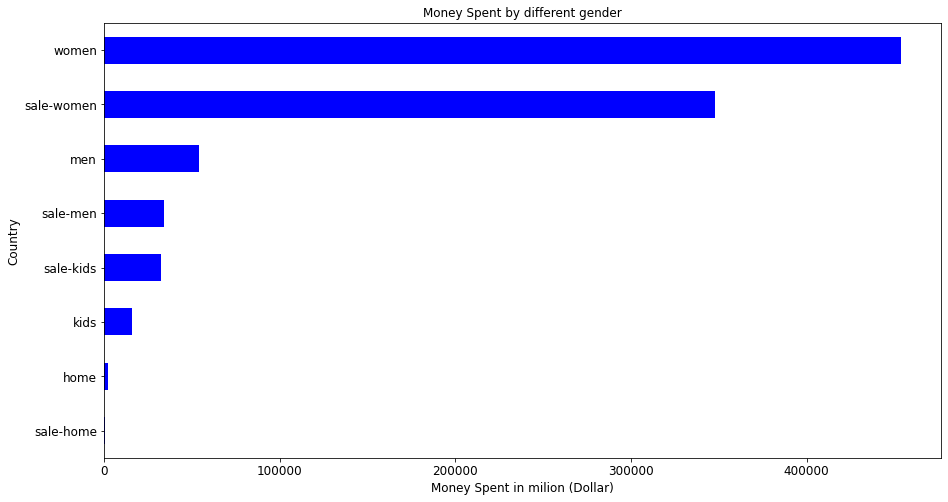

In [201]:
group_gender_amount_spent = df_EDA.groupby('gender_class')['amount_spent'].count().sort_values()


plt.subplots(figsize=(15,8))
group_gender_amount_spent.plot(kind='barh', fontsize=12, color='blue')
plt.xlabel('Money Spent in milion (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different gender', fontsize=12)
plt.show()

In [202]:
group_gender_amount_spent = df_EDA.groupby('gender_class')['amount_spent'].sum().sort_values()


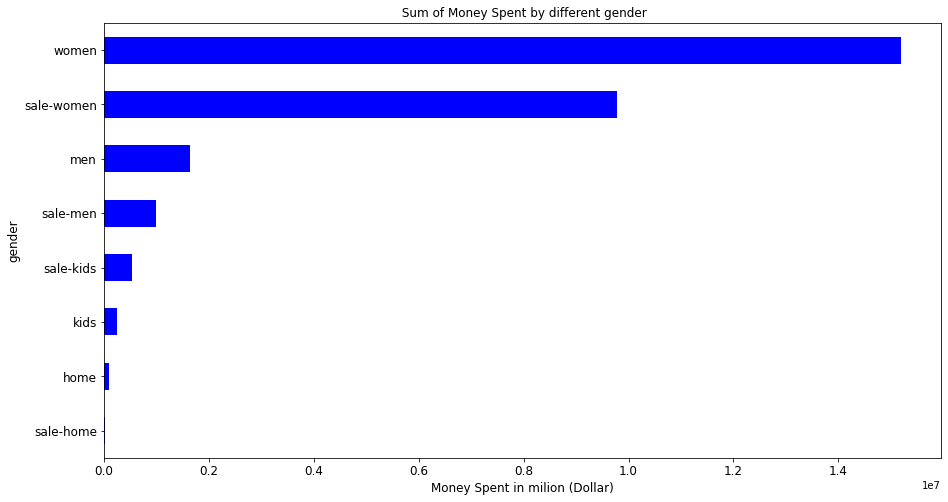

In [203]:
plt.subplots(figsize=(15,8))
group_gender_amount_spent.plot(kind='barh', fontsize=12, color='blue')
plt.xlabel('Money Spent in milion (Dollar)', fontsize=12)
plt.ylabel('gender', fontsize=12)
plt.title(' Sum of Money Spent by different gender', fontsize=12)
plt.show()

In [204]:
df_EDA.day.value_counts().sort_index()

1     92279
2    110354
3     95519
4    194190
5    141396
6    142332
7    163912
Name: day, dtype: int64

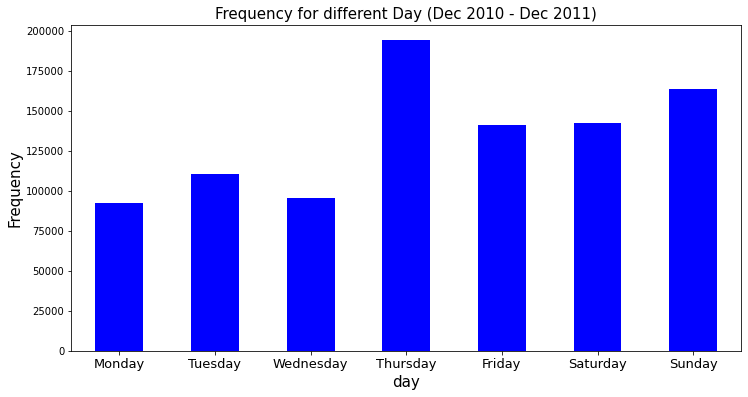

In [205]:
ax = df_EDA.day.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color='blue')
ax.set_xlabel('day',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Day (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'), rotation='horizontal', fontsize=13)
plt.show()

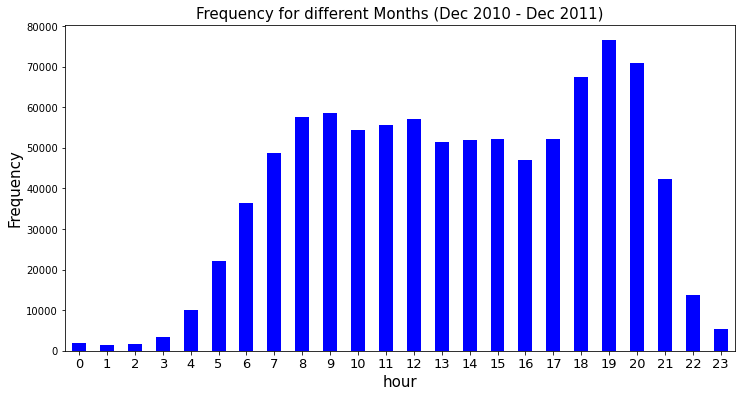

In [206]:
ax = df_EDA.hour.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color='blue')
ax.set_xlabel('hour',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels((range(0,24)), rotation='horizontal', fontsize=13)
plt.show()

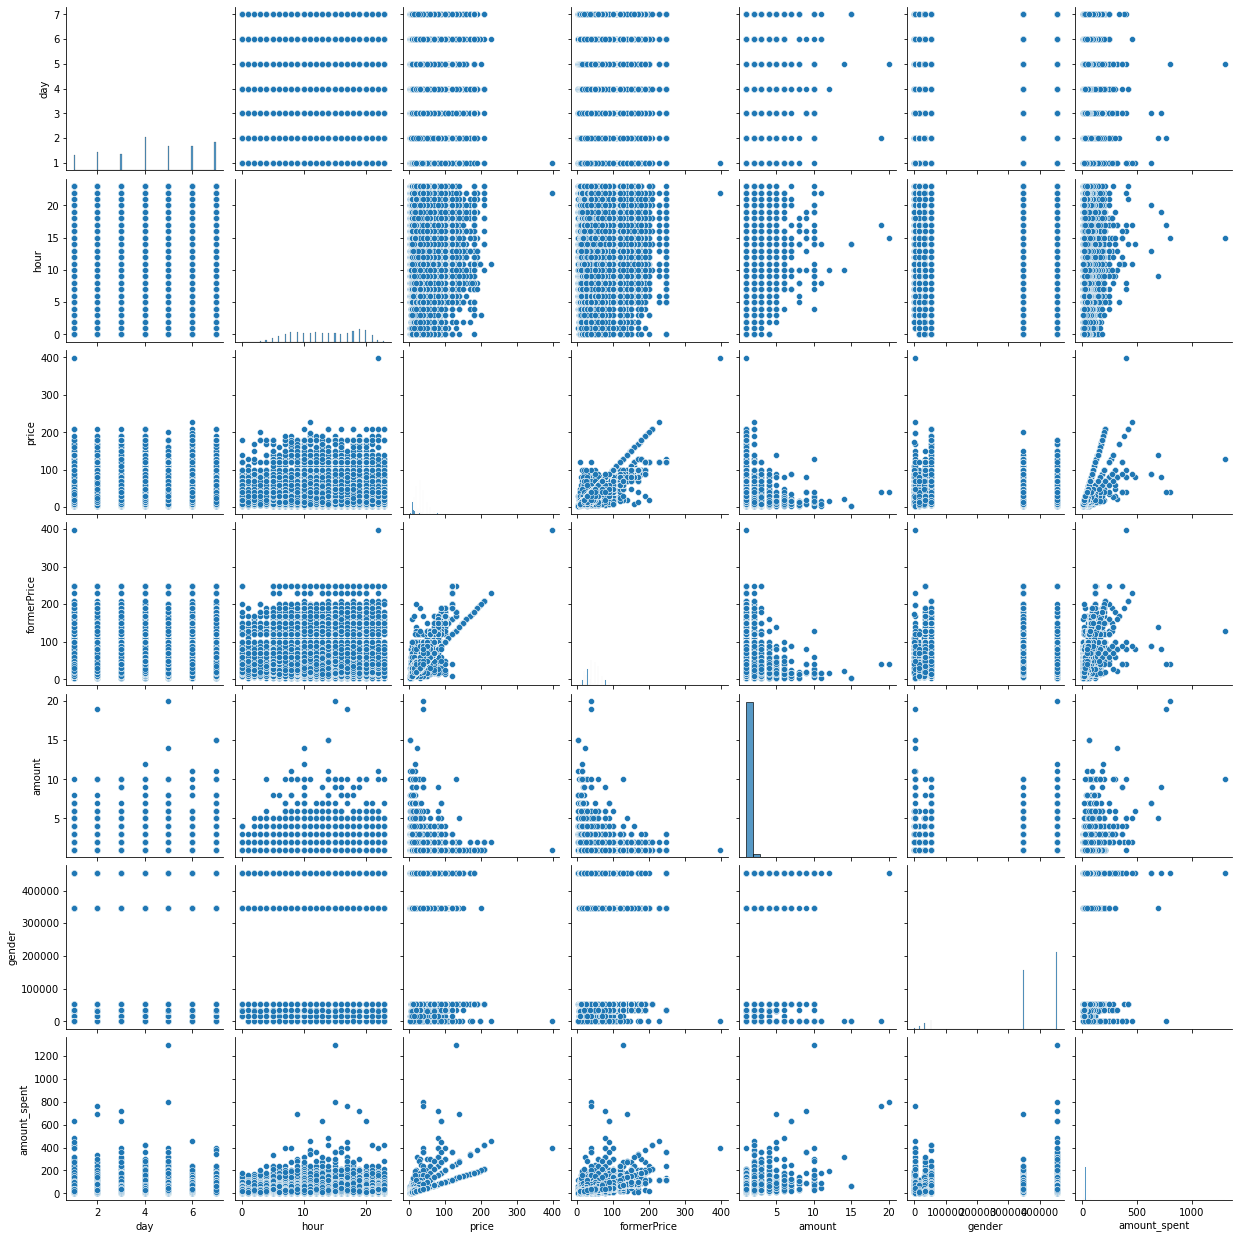

In [207]:
sns.pairplot(df_EDA, diag_kind="hist")

count    939982.000000
mean         30.314607
std          17.232908
min           2.990000
25%          19.990000
50%          29.990000
75%          39.990000
max        1299.900000
Name: amount_spent, dtype: float64


<AxesSubplot:xlabel='amount_spent', ylabel='Density'>

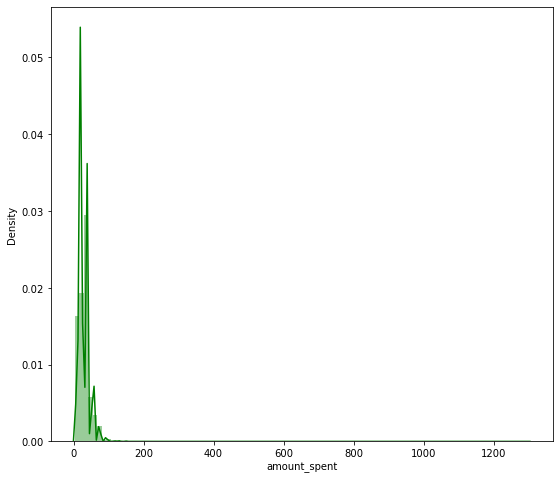

In [208]:
print(df_EDA['amount_spent'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_EDA['amount_spent'], color='g', bins=100, hist_kws={'alpha': 0.4})

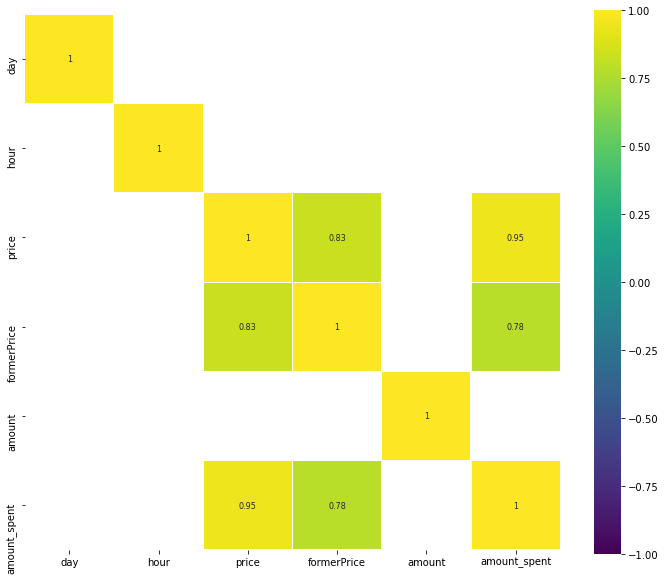

In [209]:
corr = df_EDA.drop('gender', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Feature Scaling-Standardization

In [210]:
df=df.drop(['date', 'userID', 'sessionID', 'tempSessionID', 'productID', 'name'],axis=1)

In [211]:
df.columns

Index(['price', 'formerPrice', 'size', 'amount', 'color', 'gender', 'material',
       'gender_class', 'category_Accessories', 'category_Blazers',
       'category_Blouses', 'category_Bodywear', 'category_Coats',
       'category_Dresses', 'category_Home', 'category_Jackets',
       'category_Jeans', 'category_Mixed Sets', 'category_Nightwear',
       'category_Overalls', 'category_Pants', 'category_Shirts',
       'category_Shoes', 'category_Shorts', 'category_Skirts',
       'category_Sweaters', 'category_Sweatshirts', 'category_Swim & Beach',
       'category_T-Shirts', 'category_Various Items', 'category_Vests',
       'brand_baby_boys', 'brand_baby_girls', 'brand_casual',
       'brand_collection', 'brand_edc', 'brand_kidsboys', 'brand_kidsgirls',
       'brand_kidsnewborn', 'brand_mini_kids', 'brand_sports', 'brand_youth',
       'brand_youthboys', 'brand_youthgirls'],
      dtype='object')

In [212]:
df = df.reindex(columns=['price', 'formerPrice', 'size', 'amount', 'color', 'gender', 'material',
       'category_Accessories', 'category_Blazers',
       'category_Blouses', 'category_Bodywear', 'category_Coats',
       'category_Dresses', 'category_Home', 'category_Jackets',
       'category_Jeans', 'category_Mixed Sets', 'category_Nightwear',
       'category_Overalls', 'category_Pants', 'category_Shirts',
       'category_Shoes', 'category_Shorts', 'category_Skirts',
       'category_Sweaters', 'category_Sweatshirts', 'category_Swim & Beach',
       'category_T-Shirts', 'category_Various Items', 'category_Vests',
       'brand_baby_boys', 'brand_baby_girls', 'brand_casual',
       'brand_collection', 'brand_edc', 'brand_kidsboys', 'brand_kidsgirls',
       'brand_kidsnewborn', 'brand_mini_kids', 'brand_sports', 'brand_youth',
       'brand_youthboys', 'brand_youthgirls','gender_class'])

In [213]:
df=df.drop(['gender'],axis=1)

In [214]:
df.head(4)

,price,formerPrice,size,amount,color,material,category_Accessories,category_Blazers,category_Blouses,category_Bodywear,...,brand_edc,brand_kidsboys,brand_kidsgirls,brand_kidsnewborn,brand_mini_kids,brand_sports,brand_youth,brand_youthboys,brand_youthgirls,gender_class
0,39.99,79.99,402155.835196,1,329851.716333,396874.668856,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sale-women
1,79.99,169.99,324611.083521,1,372942.553867,369305.854466,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sale-men
2,9.99,19.99,324611.083521,1,372942.553867,322513.117939,0,0,0,0,...,0,0,0,0,0,0,0,0,0,men
3,19.99,19.99,351378.021454,1,282895.571580,322513.117939,0,0,0,0,...,0,0,0,1,0,0,0,0,0,kids


In [215]:
df['gender_class'].value_counts()

women         453827
sale-women    347652
men            53845
sale-men       33870
sale-kids      32485
kids           15739
home            2006
sale-home        558
Name: gender_class, dtype: int64

In [216]:
df.loc[:, 'gender_class'].replace(['sale-home','home','kids','sale-kids','sale-men','men','sale-women','women'],[0,1,2,3,4,5,6,7], inplace=True)

In [217]:
x = df.drop(['gender_class'], axis = 1)
y = df.gender_class

In [218]:
#y_test.value_counts()

In [219]:
def featureStandardication(col):
    mean = np.mean(col, axis = 0)
    std = np.std(col, axis = 0)
    
    x_stand = (col - mean)/std
    
    return x_stand

In [220]:
x = featureStandardication(x)

# Train Test Split

In [223]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35)

In [224]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

# Decision Tree

In [225]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [226]:
model_Decision_Tree = DecisionTreeClassifier().fit(x_train, y_train)
pred_Decision_Tree = model_Decision_Tree .predict(x_test)

print('Accuracy of the model is: {:.2f}'.format(accuracy_score(y_test, pred_Decision_Tree)))
acc_dec_tree = round(accuracy_score(y_test, pred_Decision_Tree) * 100 ,2)


Accuracy of the model is: 0.87


In [227]:
accuracy_score(y_test, pred_Decision_Tree)

0.8749582059247281

In [228]:
id1=np.arange(1,len(y_test)+1,1)
output_dt=pd.DataFrame({'Id': id1,'Klasa reale':y_test,'Klasifikimi i parashikuar':pred_Decision_Tree})

In [229]:
output_dt.to_csv('Parashikimi_Decision_Tree.csv',index=False)

In [230]:
df_dt=pd.read_csv('Parashikimi_Decision_Tree.csv')

In [231]:
df_dt

,Id,Klasa reale,Klasifikimi i parashikuar
0,1,5,5
1,2,7,7
2,3,7,7
3,4,7,7
4,5,7,7
...,...,...,...
328989,328990,7,7
328990,328991,6,6
328991,328992,3,3
328992,328993,7,6


# Knn

In [232]:
from sklearn.neighbors import KNeighborsClassifier as knn
modeli_knn = knn().fit(x_train, y_train)
pred_knn= modeli_knn.predict(x_test)

print('Accuracy of the model is: {:.2f}'.format(accuracy_score(y_test, pred_knn)))
acc_KNN = round(accuracy_score(y_test, pred_knn) * 100 ,2)

Accuracy of the model is: 0.86


In [233]:
id2=np.arange(1,len(y_test)+1,1)
output_knn=pd.DataFrame({'Id': id1,'Klasa reale':y_test,'Klasifikimi i parashikuar':pred_knn})

In [234]:
output_knn.to_csv('Parashikimi_knn.csv',index=False)

In [235]:
df_knn=pd.read_csv('Parashikimi_knn.csv')

In [236]:
df_knn

,Id,Klasa reale,Klasifikimi i parashikuar
0,1,5,5
1,2,7,7
2,3,7,7
3,4,7,7
4,5,7,6
...,...,...,...
328989,328990,7,7
328990,328991,6,6
328991,328992,3,3
328992,328993,7,7


# Random Forests

In [237]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
random_forest = RandomForestClassifier(n_estimators=300)
random_forest.fit(x_train, y_train)

pred_random_forest= random_forest.predict(x_test)


print('Accuracy of the model is: {:.2f}'.format(accuracy_score(y_test, pred_random_forest)))
acc_random_forest = round(accuracy_score(y_test, pred_random_forest) * 100 ,2)

Accuracy of the model is: 0.88


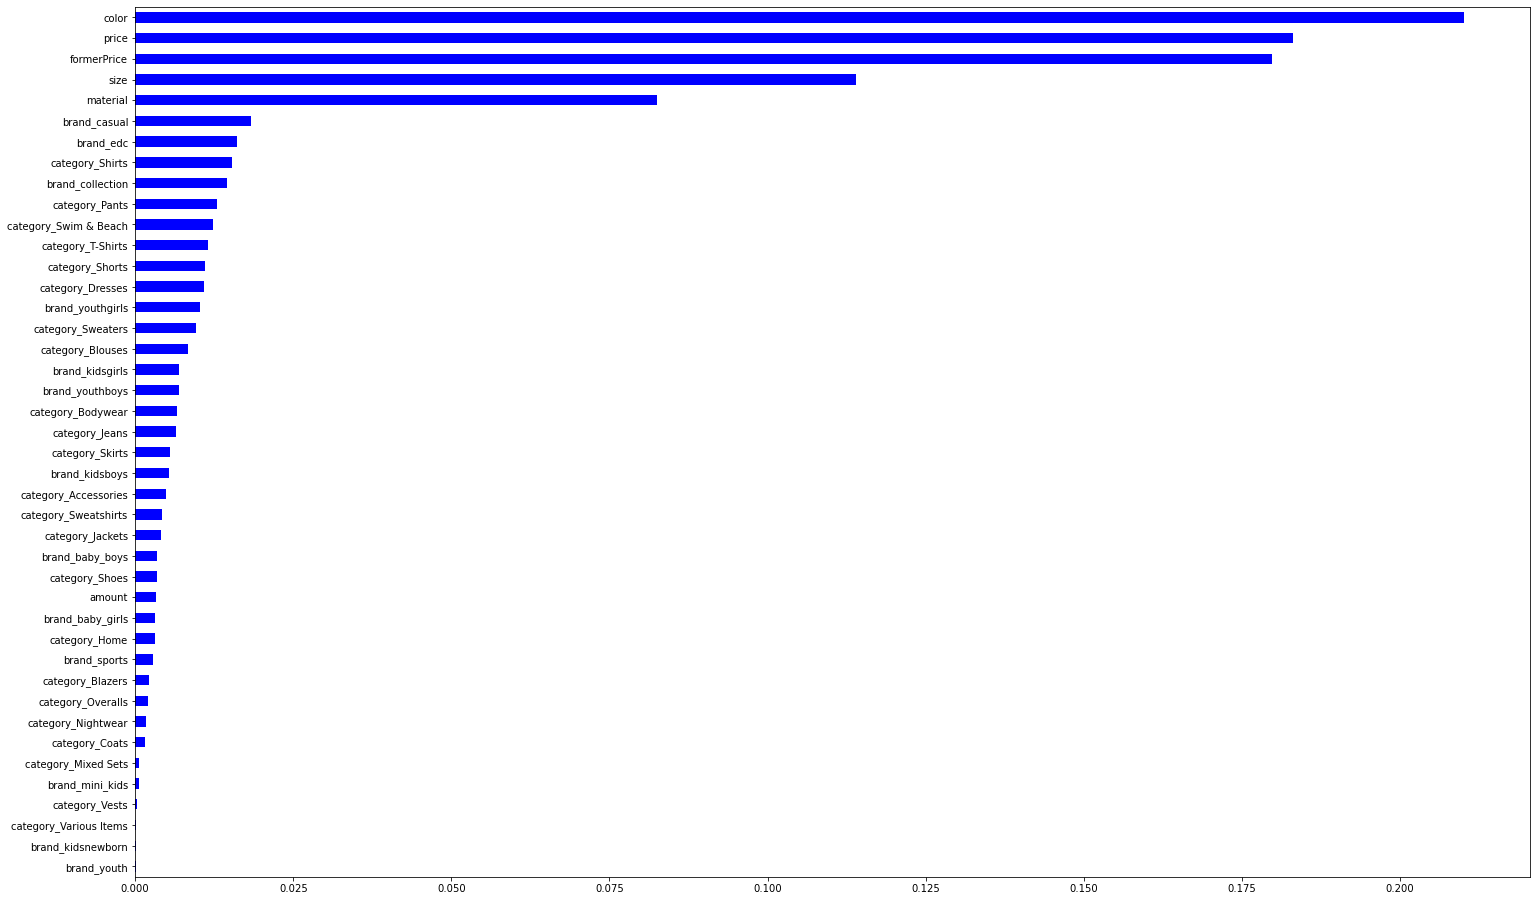

In [239]:
importances_rf = pd.Series(random_forest.feature_importances_, index = x.columns)
sorted_importances_rf = importances_rf.sort_values()
plt.subplots(figsize=(25,16))
sorted_importances_rf.plot(kind = 'barh', color = 'blue')
plt.show()

In [240]:
id3=np.arange(1,len(y_test)+1,1)
output_rf=pd.DataFrame({'Id': id1,'Klasa reale':y_test,'Klasifikimi i parashikuar':pred_random_forest})

In [241]:
output_rf.to_csv('Parashikimi_rf.csv',index=False)

In [242]:
df_rf=pd.read_csv('Parashikimi_rf.csv')

In [243]:
df_rf

,Id,Klasa reale,Klasifikimi i parashikuar
0,1,5,5
1,2,7,7
2,3,7,7
3,4,7,7
4,5,7,7
...,...,...,...
328989,328990,7,7
328990,328991,6,6
328991,328992,3,3
328992,328993,7,6


# Logistic Regression

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
model_log_reg = LogisticRegression().fit(x_train,y_train)


In [245]:
pred_log_reg= model_log_reg.predict(x_test)

In [246]:
acc_logistic_regresion = round(accuracy_score(y_test, pred_log_reg) * 100 ,2)

In [247]:
pred_log_reg

array([7, 7, 7, ..., 3, 6, 6], dtype=int64)

In [248]:
print('Accuracy of the model is: {:.2f}'.format(accuracy_score(y_test, pred_log_reg)))


Accuracy of the model is: 0.67


In [249]:
id4=np.arange(1,len(y_test)+1,1)
output_lr=pd.DataFrame({'Id': id1,'Klasa reale':y_test,'Klasifikimi i parashikuar':pred_log_reg})

In [250]:
output_lr.to_csv('Parashikimi_lr.csv',index=False)

In [251]:
df_lr=pd.read_csv('Parashikimi_lr.csv')

In [252]:
df_lr

,Id,Klasa reale,Klasifikimi i parashikuar
0,1,5,7
1,2,7,7
2,3,7,7
3,4,7,7
4,5,7,6
...,...,...,...
328989,328990,7,6
328990,328991,6,6
328991,328992,3,3
328992,328993,7,6


# Ensemble Implementation 

In [253]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import  accuracy_score, classification_report


In [254]:
acc_score = [
    ('DecisionTree',acc_dec_tree ),
    ('KNN', acc_KNN),
    ('Random Forest',acc_random_forest)
]


In [255]:
for classifier_name, acc_s in acc_score:
    print('{:s} : {:.3f}'.format(classifier_name,acc_s ))

DecisionTree : 87.500
KNN : 86.180
Random Forest : 87.830


In [256]:
DT = DecisionTreeClassifier()
knn = knn()
RF = RandomForestClassifier()

In [257]:
classifiers = [
    ('DecisionTree',DT),
    ('KNN', knn),
    ('Random Forest',RF)
]


In [258]:
voting = VotingClassifier(estimators = classifiers)
voting.fit(x_train,y_train)
y_pred_voting = voting.predict(x_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)

In [259]:
voting_accuracy

0.8769582423995574

In [260]:
id5=np.arange(1,len(y_test)+1,1)
output_voting=pd.DataFrame({'Id': id1,'Klasa reale':y_test,'Klasifikimi i parashikuar':y_pred_voting})

In [261]:
output_voting.to_csv('Parashikimi_voting.csv',index=False)

In [262]:
df_voting=pd.read_csv('Parashikimi_voting.csv')

In [263]:
df_voting

,Id,Klasa reale,Klasifikimi i parashikuar
0,1,5,5
1,2,7,7
2,3,7,7
3,4,7,7
4,5,7,7
...,...,...,...
328989,328990,7,7
328990,328991,6,6
328991,328992,3,3
328992,328993,7,7


# Modeli me i mire

In [264]:
results = pd.DataFrame({
    'Model': ['DecisionTree', 'KNN','Random Forest', 'Logistic Regression', 
              'Voting Classifier'],
    'Score': [acc_dec_tree ,acc_KNN ,acc_random_forest,acc_logistic_regresion, 
               voting_accuracy*100]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
87.830000,Random Forest
87.695824,Voting Classifier
87.500000,DecisionTree
86.180000,KNN
67.340000,Logistic Regression


# confusion matrix

In [265]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import cv2

In [266]:
confusion_matric = cv2.imread("Confusion-matrix.png", cv2.IMREAD_COLOR)


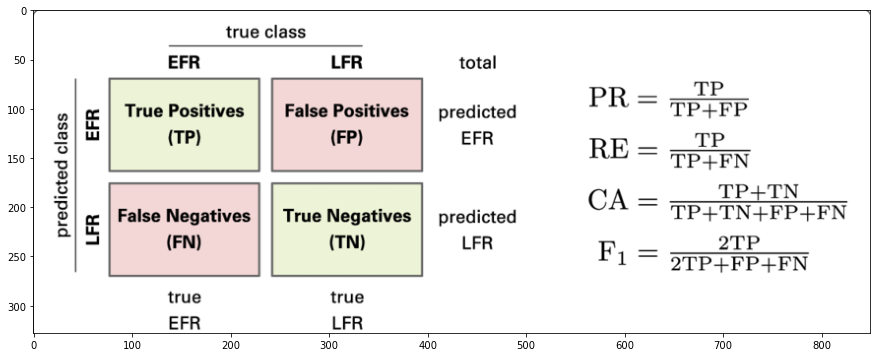

In [267]:
plt.figure(figsize=(15,12))
plt.imshow(cv2.cvtColor(confusion_matric,cv2.COLOR_BGR2RGB))

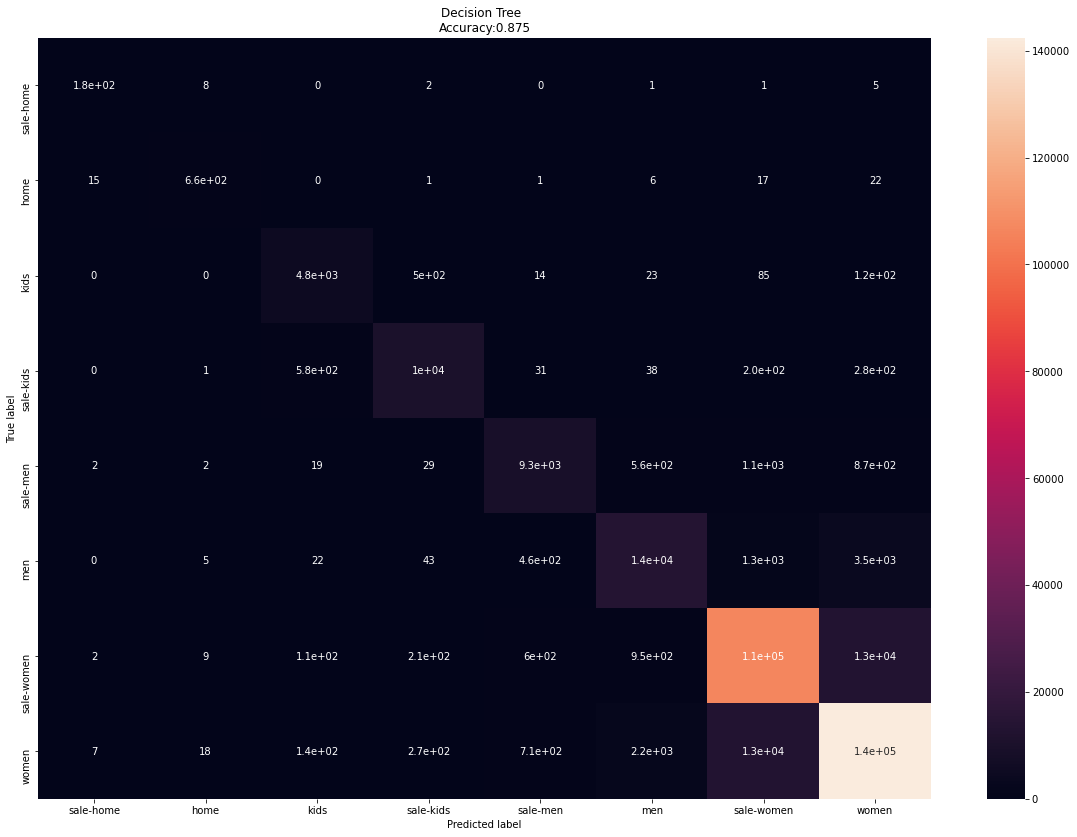

In [268]:
cm = confusion_matrix(y_test,pred_Decision_Tree) 


cm_df = pd.DataFrame(cm,
                     index = ['sale-home','home','kids','sale-kids','sale-men','men','sale-women','women'], 
                     columns = ['sale-home','home','kids','sale-kids','sale-men','men','sale-women','women'])
plt.figure(figsize=(20,14))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree  \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_Decision_Tree)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

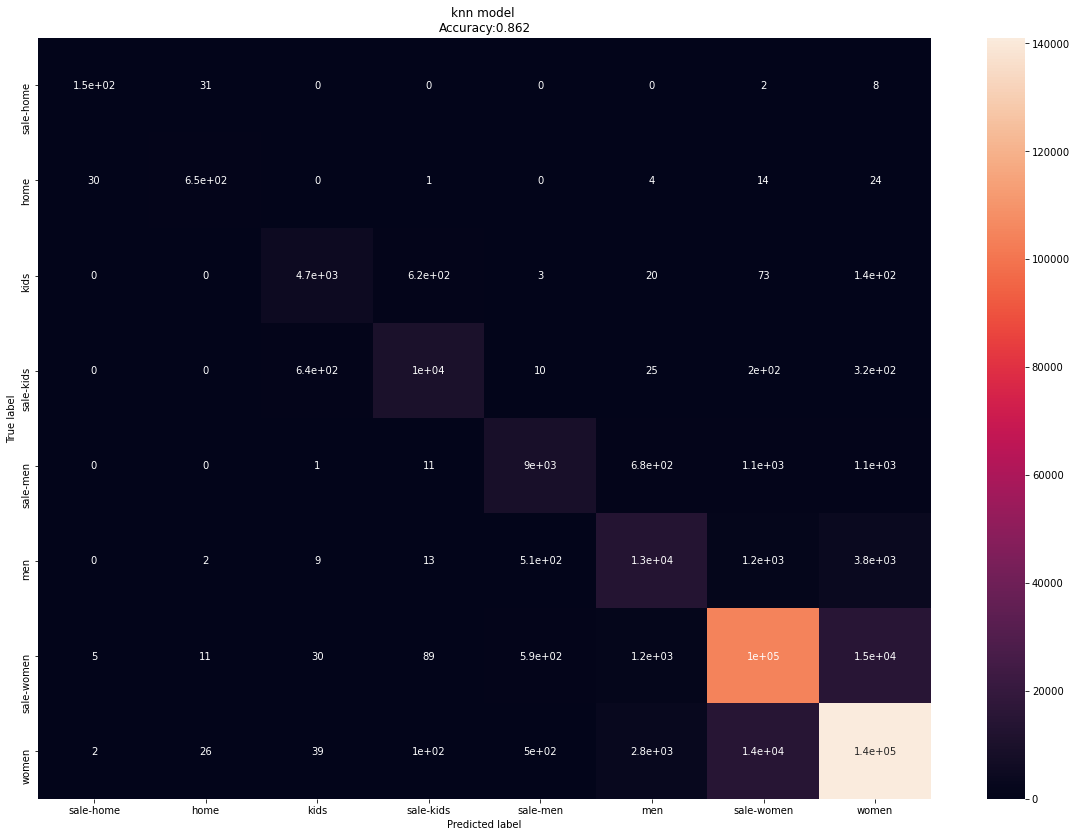

In [269]:
cm = confusion_matrix(y_test,pred_knn) 


cm_df = pd.DataFrame(cm,
                     index = ['sale-home','home','kids','sale-kids','sale-men','men','sale-women','women'], 
                     columns = ['sale-home','home','kids','sale-kids','sale-men','men','sale-women','women'])
plt.figure(figsize=(20,14))
sns.heatmap(cm_df, annot=True)
plt.title('knn model \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_knn)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

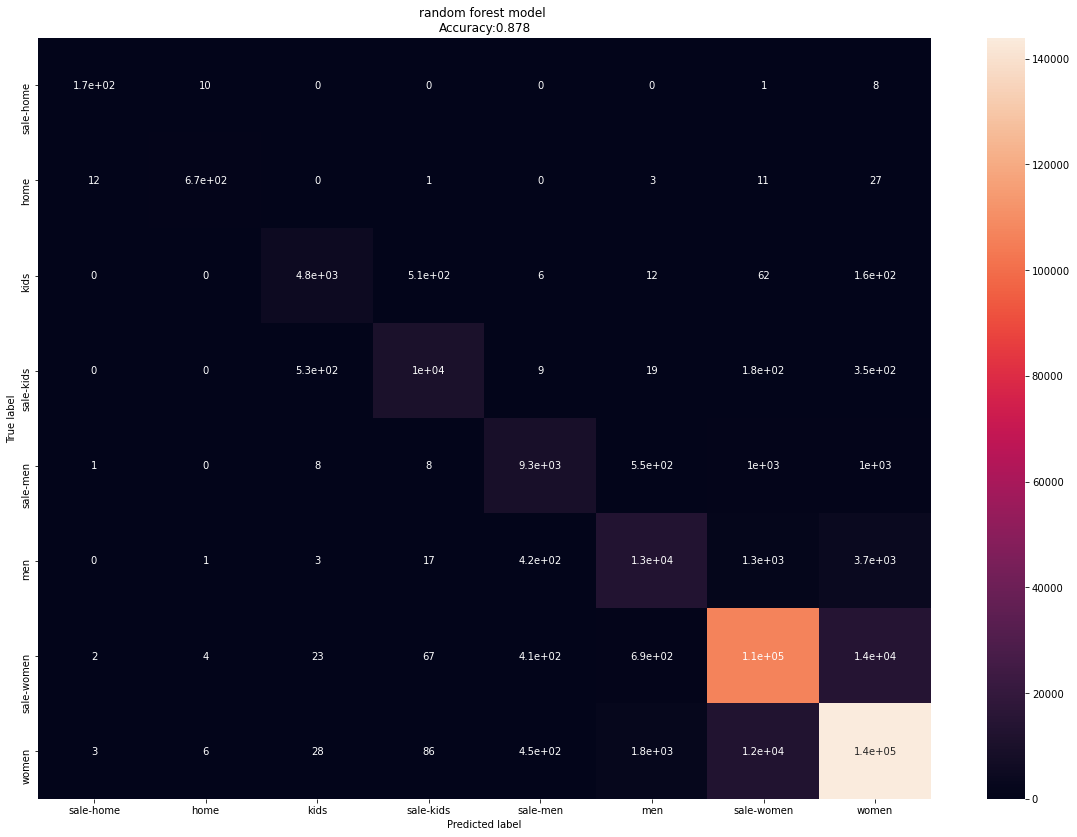

In [270]:
cm = confusion_matrix(y_test,pred_random_forest) 

cm_df = pd.DataFrame(cm,
                     index = ['sale-home','home','kids','sale-kids','sale-men','men','sale-women','women'], 
                     columns = ['sale-home','home','kids','sale-kids','sale-men','men','sale-women','women'])
plt.figure(figsize=(20,14))
sns.heatmap(cm_df, annot=True)
plt.title('random forest model \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_random_forest)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

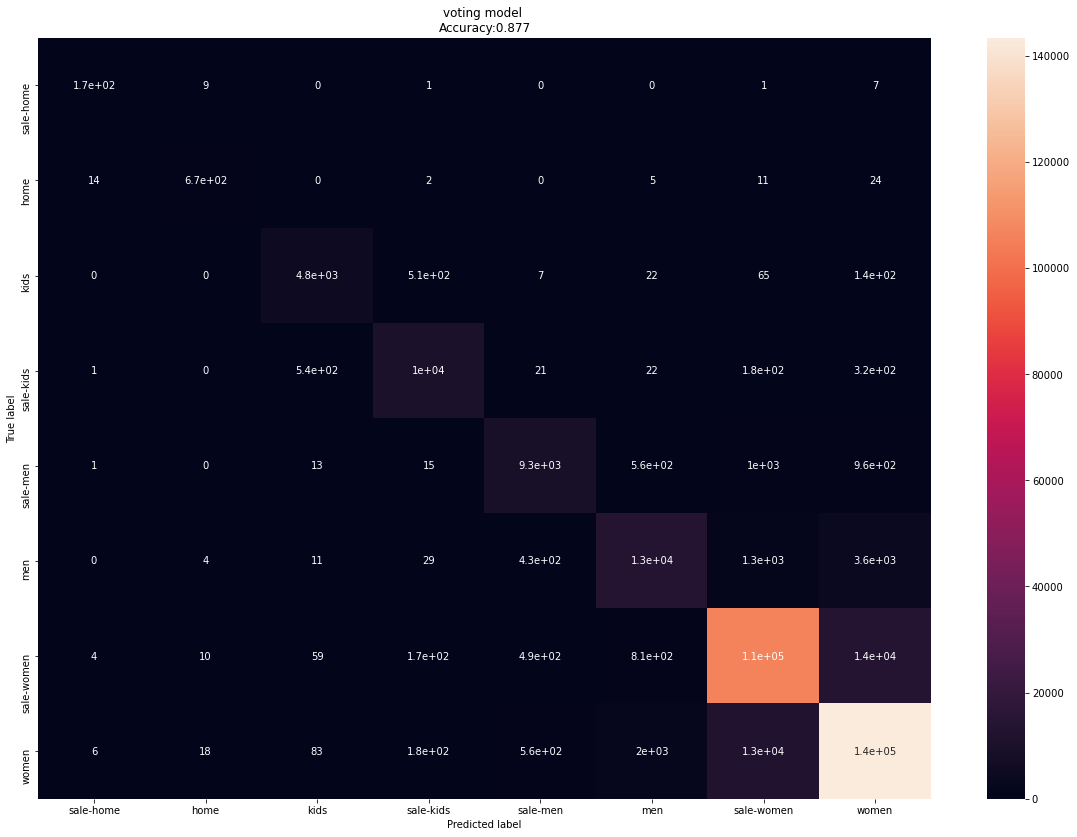

In [271]:
cm = confusion_matrix(y_test,y_pred_voting) 

cm_df = pd.DataFrame(cm,
                     index = ['sale-home','home','kids','sale-kids','sale-men','men','sale-women','women'], 
                     columns = ['sale-home','home','kids','sale-kids','sale-men','men','sale-women','women'])
plt.figure(figsize=(20,14))
sns.heatmap(cm_df, annot=True)
plt.title('voting model \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_voting)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

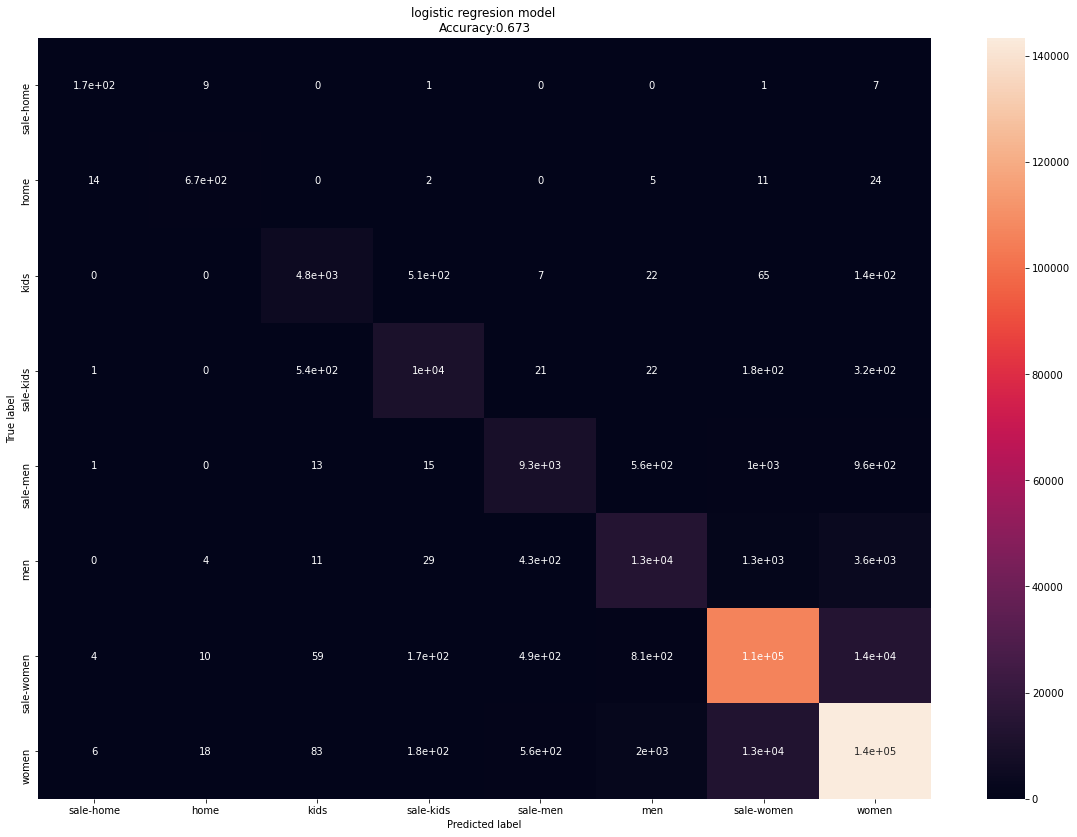

In [272]:
cm = confusion_matrix(y_test,y_pred_voting) 

cm_df = pd.DataFrame(cm,
                     index = ['sale-home','home','kids','sale-kids','sale-men','men','sale-women','women'], 
                     columns = ['sale-home','home','kids','sale-kids','sale-men','men','sale-women','women'])
plt.figure(figsize=(20,14))
sns.heatmap(cm_df, annot=True)
plt.title('logistic regresion model \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,pred_log_reg )))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<AxesSubplot:xlabel='gender_class', ylabel='count'>

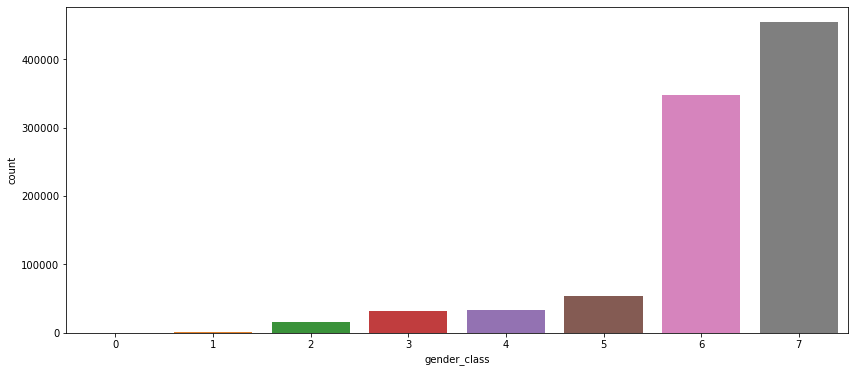

In [273]:
plt.figure(figsize=(14,6))
sns.countplot(df['gender_class'])

# Keras_Binary-Classification

In [274]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [275]:
dfnn=df_EDA

In [276]:
dfnn

,date,day,hour,userID,sessionID,tempSessionID,productID,name,price,formerPrice,size,amount,color,category,brand,gender,material,gender_class,amount_spent
0,2021-07-01 00:01:00,4,0,vsKXLrDqlOFwBiQQoxAB,ioAaWdN9SEvxNrtopnKXTjwy8X4EXFMW,VPMTToxkA9sL1LAoaST0lZcUe47LKi,0000100_1a,Mit Leinen: Hemdblusenkleid,39.99,79.99,42,1,BEIGE,Dresses,collection,347652,Viskose,sale-women,39.99
1,2021-07-01 00:09:00,4,0,Gmw1o6XUzcGsMuSf8MbD,N1XkNhQ5FGrVz6zFJ0Py4Gd1IEuRl2yw,HUQX4nVi3yqDz3P3tUHZcuGLRQrxG3,0000200_1a,#ReimagineFlexibility: 2-in-1 Softshell-Parka,79.99,169.99,XL,1,BLACK,Jackets,collection,33870,Polyester,sale-men,79.99
2,2021-07-01 00:11:00,4,0,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000300_1a,T-Shirt aus 100% Organic Cotton,9.99,19.99,XL,1,BLACK,T-Shirts,casual,53845,Baumwolle,men,9.99
3,2021-07-01 00:11:00,4,0,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000400_1a,Set: Oberteil und Hose,19.99,19.99,2XL,1,BLUSH,Mixed Sets,kidsnewborn,15739,Baumwolle,kids,19.99
4,2021-07-01 00:11:00,4,0,uxFDhpJXWbs0ivMwg43g,SfqzynXJMUSFJREznOBSYMdp2sdGRxDN,7vnouAeq5O4S4XOZDQXCeT4k8wbpH7,0000500_1a,Set: Oberteil und Hose,19.99,29.99,XL,1,CORAL,Mixed Sets,baby_girls,32485,Baumwolle,sale-kids,19.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939977,2021-07-31 23:56:00,6,23,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0932000_1a,CURVY Crinkle-Blusenkleid mit Paisley-Print,39.99,79.99,M,1,LIGHT,Dresses,casual,453827,Viskose,women,39.99
939978,2021-07-31 23:56:00,6,23,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0372000_1a,Espadrilles in Lederoptik,39.99,49.99,38,1,BLACK,Shoes,casual,453827,Polyurethan,women,39.99
939979,2021-07-31 23:56:00,6,23,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0688500_1a,Pantolette mit Schnalle in Kroko-Optik,29.99,39.99,38,1,CARAMEL,Shoes,casual,453827,Polyurethan,women,29.99
939980,2021-07-31 23:56:00,6,23,ftZbEJhTk6tizebgcyPg,zZIPqNPEJOtjmcoc597LNk1XzEsZSgwQ,rh3izlLmRIVTQDZGD8CIIK6d0kQtzR,0777100_1a,Wattierter,29.99,29.99,C,1,GREY,Bodywear,casual,453827,Baumwolle,women,29.99


In [277]:
dfnn.columns

Index(['date', 'day', 'hour', 'userID', 'sessionID', 'tempSessionID',
       'productID', 'name', 'price', 'formerPrice', 'size', 'amount', 'color',
       'category', 'brand', 'gender', 'material', 'gender_class',
       'amount_spent'],
      dtype='object')

In [278]:
dfnn=dfnn.drop(['date', 'day', 'hour', 'userID', 'sessionID', 'tempSessionID',
       'productID', 'name','gender'],axis=1)

<AxesSubplot:xlabel='gender_class', ylabel='count'>

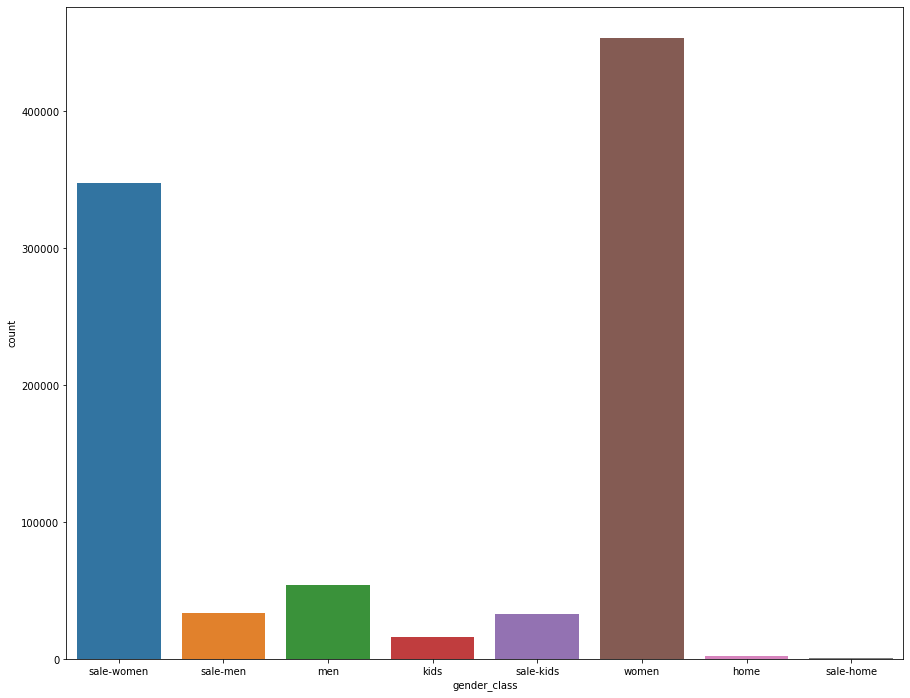

In [279]:
plt.figure(figsize=(15,12))
sns.countplot(dfnn['gender_class'])

In [280]:
dfnn.loc[:, 'gender_class'].replace(['sale-women'],['women'], inplace=True)
dfnn.loc[:, 'gender_class'].replace(['sale-men',"sale-home","home","sale-kids","kids",'sale-men','men'],
                                    ['others','others','others','others','others','others','others'], inplace=True)

In [281]:
dfnn.loc[:, 'gender_class'].replace(['women'],[1], inplace=True)
dfnn.loc[:, 'gender_class'].replace(['others'],[0], inplace=True)

<AxesSubplot:xlabel='gender_class', ylabel='count'>

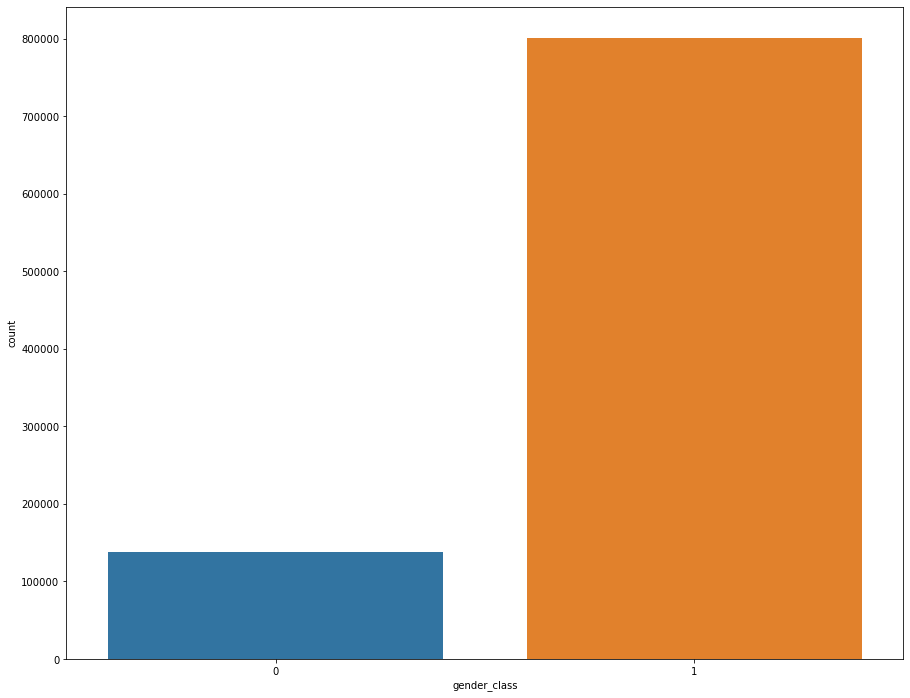

In [282]:
plt.figure(figsize=(15,12))
sns.countplot(dfnn['gender_class'])

In [283]:
col=['size','color','category','brand','material']

In [284]:
for i in col:
    dfnn[i] = dfnn.groupby(i)['gender_class'].transform("mean")
    

In [285]:
dfnn

,price,formerPrice,size,amount,color,category,brand,material,gender_class,amount_spent
0,39.99,79.99,0.991762,1,0.795467,0.959257,0.936087,0.986996,1,39.99
1,79.99,169.99,0.763287,1,0.902694,0.655487,0.936087,0.922763,0,79.99
2,9.99,19.99,0.763287,1,0.902694,0.756849,0.888437,0.757513,0,9.99
3,19.99,19.99,0.813997,1,0.646934,0.055233,0.043210,0.757513,0,19.99
4,19.99,29.99,0.763287,1,0.909581,0.055233,0.037318,0.757513,0,19.99
...,...,...,...,...,...,...,...,...,...,...
939977,39.99,79.99,0.873382,1,0.802738,0.959257,0.888437,0.986996,1,39.99
939978,39.99,49.99,0.992587,1,0.902694,0.973313,0.888437,0.971402,1,39.99
939979,29.99,39.99,0.992587,1,0.842974,0.973313,0.888437,0.971402,1,29.99
939980,29.99,29.99,0.962914,1,0.670822,0.953745,0.888437,0.757513,1,29.99


In [286]:
X = dfnn.drop(['gender_class'],axis=1).values
Y = dfnn['gender_class'].values

In [287]:
X=featureStandardication(X)

In [288]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

In [289]:
kf = KFold(n_splits=2)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

TRAIN: [469991 469992 469993 ... 939979 939980 939981] TEST: [     0      1      2 ... 469988 469989 469990]
TRAIN: [     0      1      2 ... 469988 469989 469990] TEST: [469991 469992 469993 ... 939979 939980 939981]


In [290]:
X_train.shape

(469991, 9)

In [291]:
model = Sequential()



model.add(Dense(units=9,activation='relu'))

model.add(Dense(units=5,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')

In [292]:
model.fit(x=X_train, 
          y=Y_train, 
          epochs=10,
           verbose=1
          )

Epoch 1/10
14688/14688 [==============================] - 27s 2ms/step - loss: 0.2242
Epoch 2/10
14688/14688 [==============================] - 16s 1ms/step - loss: 0.2111
Epoch 3/10
14688/14688 [==============================] - 17s 1ms/step - loss: 0.2079
Epoch 4/10
14688/14688 [==============================] - 17s 1ms/step - loss: 0.2053
Epoch 5/10
14688/14688 [==============================] - 17s 1ms/step - loss: 0.2039
Epoch 6/10
14688/14688 [==============================] - 17s 1ms/step - loss: 0.2029
Epoch 7/10
14688/14688 [==============================] - 16s 1ms/step - loss: 0.2023
Epoch 8/10
14688/14688 [==============================] - 17s 1ms/step - loss: 0.2019
Epoch 9/10
14688/14688 [==============================] - 17s 1ms/step - loss: 0.2012
Epoch 10/10
14688/14688 [==============================] - 17s 1ms/step - loss: 0.2010


In [293]:
predictions = model.predict_classes(X_test)

In [294]:
NN=accuracy_score(Y_test,predictions)

In [295]:
print(int(NN*100),'%')

91 %


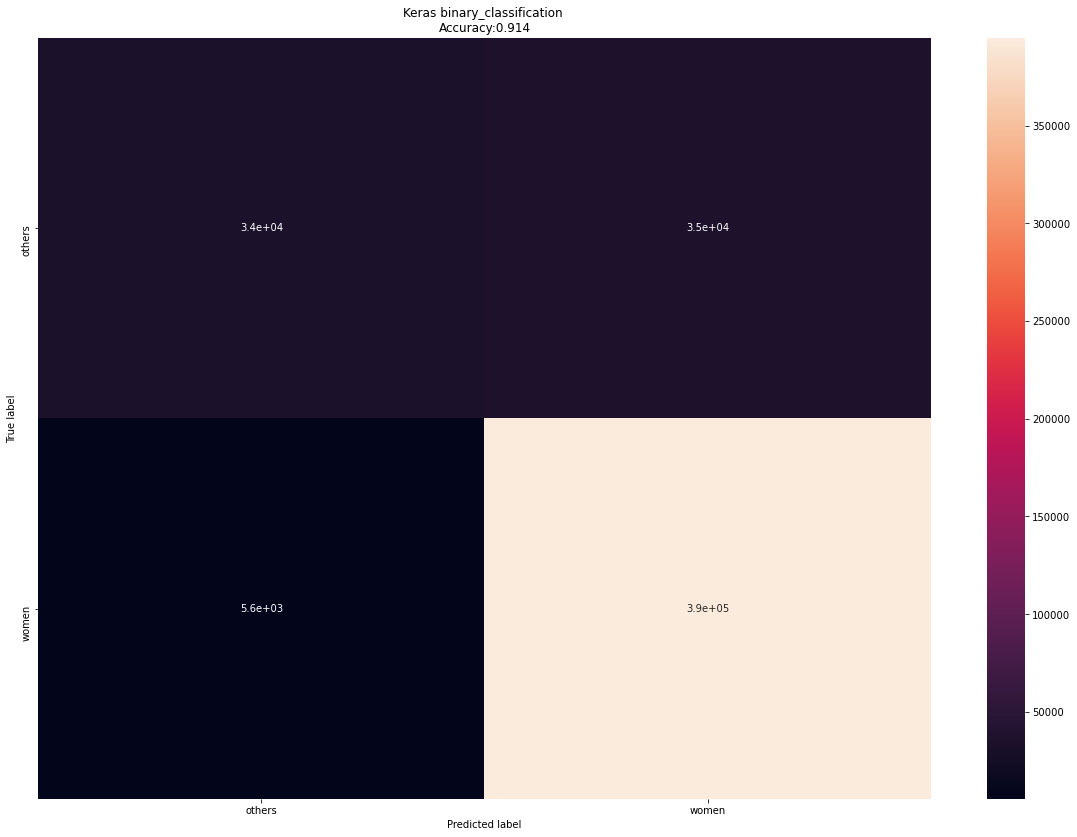

In [296]:
cm = confusion_matrix(Y_test,predictions) 

cm_df = pd.DataFrame(cm,
                     index = ['others','women'], 
                     columns = ['others','women'])
plt.figure(figsize=(20,14))
sns.heatmap(cm_df, annot=True)
plt.title('Keras binary_classification \nAccuracy:{0:.3f}'.format(accuracy_score(Y_test,predictions )))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Computing AUROC and  ROC curves

In [297]:
from sklearn.metrics import roc_curve ,roc_auc_score,auc
from sklearn.multiclass import OneVsRestClassifier

In [298]:
pred_prob1 = model.predict_proba(X_test)

In [299]:
from sklearn.metrics import roc_curve


fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1, pos_label=1)

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

In [300]:
auc_score1 = roc_auc_score(Y_test, pred_prob1)
auc_score1

0.922472982125909

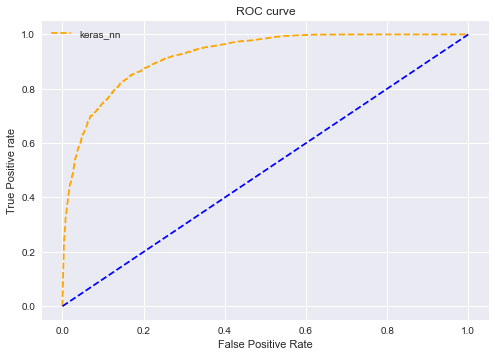

In [301]:
plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='keras_nn')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [302]:
# Multiclass logsitic regresion

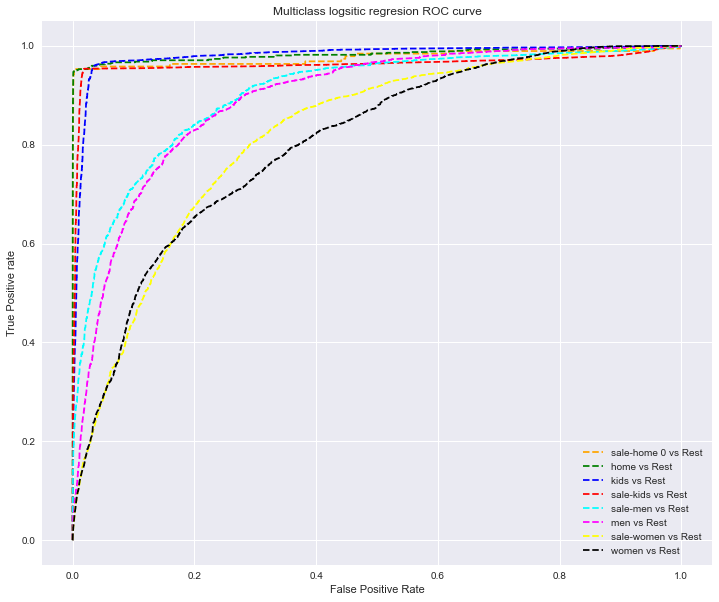

In [303]:
log = OneVsRestClassifier(LogisticRegression())
log.fit(x_train, y_train)
pred = log.predict(x_test)
pred_prob = log.predict_proba(x_test)


fpr = {}
tpr = {}
thresh ={}

n_class = 8

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
plt.figure(figsize=(12, 10))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='sale-home 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='home vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='kids vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='sale-kids vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='cyan', label='sale-men vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='men vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='sale-women vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='black', label='women vs Rest')
plt.title('Multiclass logsitic regresion ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);     